In [ ]:
%load_ext autoreload
%autoreload 2

In [7]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 
from fenics import File
import cranknicolson as cn
import bdf2 


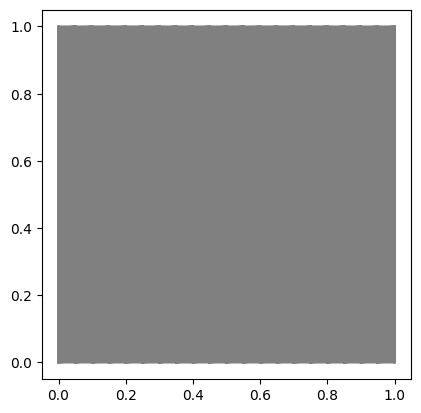

In [8]:
mesh = UnitSquareMesh(20,200)
plot(mesh)

In [8]:
m0 = 1e-3
dt = 0.5
T = 100
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/provaP1"

solver = f.Solver1D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass = solver.solve()

time=0: 
Calling FFC just-in-time (JIT) compiler, this may take some time.
iter=1: norm=0.00144755
Solving linear variational problem.
iter=2: norm=2.32084e-06
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
time=0.5: 
iter=1: norm=0.000294328
time=1: 
Solving linear variational problem.
Solving linear variational problem.
iter=1: norm=0.000368543Solving linear variational problem.

Solving linear variational problem.
time=1.5: 
iter=1: norm=0.000460002
time=2: 
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
iter=1: norm=0.000572694
Solving linear variational problem.
time=2.5: 
iter=1: norm=0.000710776Solving linear variational problem.

time=3: 
Solving linear variational problem.
iter=1: norm=0.000878978
Solving linear variational problem.
Solving linear variational problem.
time=3.5: 
iter=1: norm=0.00108262
Solving linear variationa

0.6356582710208699 0.2400507721294846 0.28291611602272576 0.4778032056673864
0.6187045623563271 0.2255524622553256 0.2847405620433734 0.490517621071226
0.6558864299672258 0.25646135218777416 0.2805005782560592 0.46376471587705115
0.6656709787262749 0.26407564331691846 0.2792779959627467 0.4573535632303163


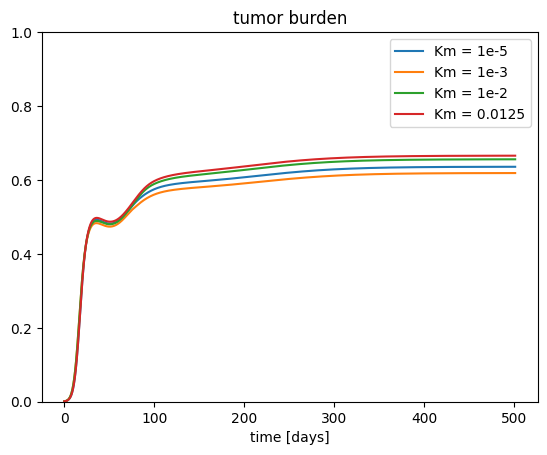

In [7]:
# tumor burden 

# mass1 = np.load('solutions/B_Km1e-3/mass.npy')
# csc1 = np.load('solutions/B_Km1e-3/csc_mass.npy')
# dc1 = np.load('solutions/B_Km1e-3/dc_mass.npy')
# tdc1 = np.load('solutions/B_Km1e-3/tdc_mass.npy')
mass1 = np.load('solutions/B_Km0.005/mass.npy')
csc1 = np.load('solutions/B_Km0.005/csc_mass.npy')
dc1 = np.load('solutions/B_Km0.005/dc_mass.npy')
tdc1 = np.load('solutions/B_Km0.005/tdc_mass.npy')

mass2 = np.load('solutions/B_Km1e-2/mass.npy')
csc2 = np.load('solutions/B_Km1e-2/csc_mass.npy')
dc2 = np.load('solutions/B_Km1e-2/dc_mass.npy')
tdc2 = np.load('solutions/B_Km1e-2/tdc_mass.npy')

mass3 = np.load('solutions/B_Km1e-3/mass.npy')
csc3 = np.load('solutions/B_Km1e-3/csc_mass.npy')
dc3 = np.load('solutions/B_Km1e-3/dc_mass.npy')
tdc3 = np.load('solutions/B_Km1e-3/tdc_mass.npy')

mass4 = np.load('solutions/B/mass.npy')
csc4 = np.load('solutions/B/cscmass.npy')
dc4 = np.load('solutions/B/dcmass.npy')
tdc4 = np.load('solutions/B/tdcmass.npy')

time1 = np.linspace(0,501,int(501/0.5))
time3 = np.linspace(0,401,int(401/0.1))
time2 = np.linspace(0,150,int(150/0.1))
time4 = np.linspace(0,501,int(501/0.1))

plt.plot(time4,mass1)
plt.plot(time1,mass3)
plt.plot(time1,mass2)
plt.plot(time4,mass4)

plt.title('tumor burden')
plt.xlabel('time [days]')
plt.ylim([0,1])
print(mass1[-1],csc1[-1],dc1[-1],tdc1[-1])

print(mass3[-1],csc3[-1],dc3[-1],tdc3[-1])
print(mass2[-1],csc2[-1],dc2[-1],tdc2[-1])
print(mass4[-1],csc4[-1],dc4[-1],tdc4[-1])
plt.legend(['Km = 1e-5','Km = 1e-3','Km = 1e-2','Km = 0.0125'])
plt.show()

0.6337428982202408


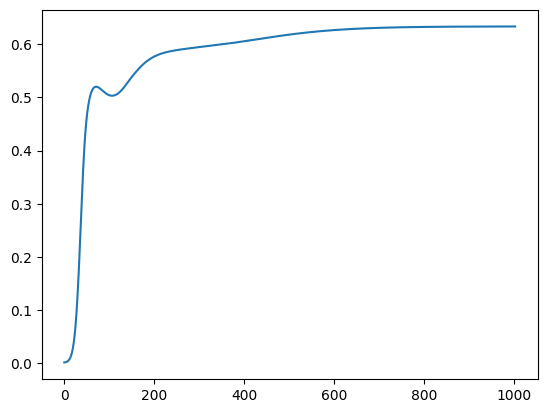

In [26]:
mass = np.load('solutions/bdf2/mass.npy')
plt.plot(mass)
# mass2 = np.load('solutions/comparison/mass.npy')
# plt.plot(mass2)
# plt.xlim([0,4000])
print(mass[-1])

0.23824738672065454 0.283093212223624 0.4794353040640001


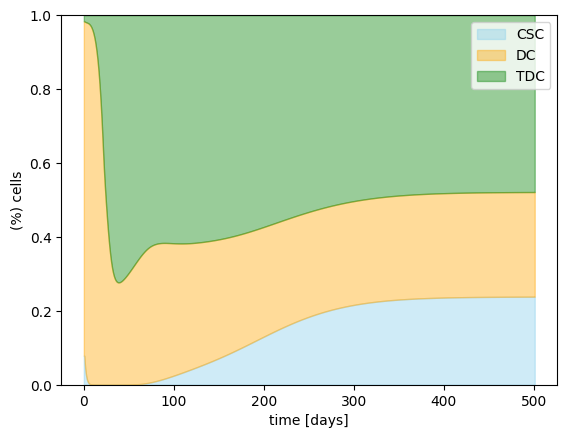

In [28]:
path_sol = 'solutions/bdf2'
mass = np.load(path_sol + '/mass.npy')
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,501.5,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
# plt.xlim([0,400])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
# i = 1200
print(csc[-1],dc[-1],tdc[-1])


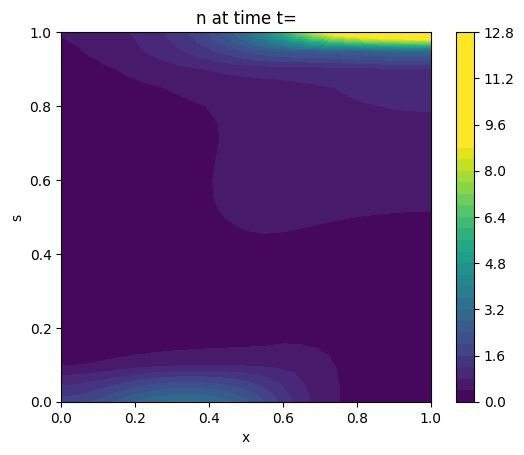

In [35]:
V = FunctionSpace(mesh,"P",2)
n1 = Function(V)
n2 = Function(V)
nfile = XDMFFile('solutions/B_Km1e-2/n.xdmf')
nfile.read_checkpoint(n1,"n",100)
sol = plot(n1,vmax=9)
plt.colorbar(sol)
plt.title('n at time t=' )
plt.xlabel('x')
plt.ylabel('s')
plt.show()
# for s in np.arange(0,1,0.05):
#     print(n1(0.5,s))
# # print(n1(0,0.5))

In [ ]:
c = Function(V)
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
cfile = XDMFFile('solutions/B_Km0.005/c.xdmf')

cfile.read_checkpoint(c,"c",0)
c1D = interpolate(c,V1D)
sol = plot(c1D)
plt.title('c at time: %f')# %(i*save_interval*dt) )
# plt.ylim([0,1])
plt.show()
print(c1D.vector().min())

In [ ]:
class VerticalAverage(UserExpression):
    def __init__(self, f, quad_degree, **kwargs):
        super().__init__(**kwargs)
        self.f = f
        self.points, self.weights = leggauss(quad_degree)
        self.x = 0.5*(self.points + 1)
        assert f.ufl_shape == ()
        
    def eval(self, values, x):
        values[0] = 0.5*sum(wq*self.f(x[0], xq) for xq, wq in zip(self.x, self.weights))

    def value_shape(self):
        return ()


mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
n = Function(V)
nfile = XDMFFile('solutions/B_Km0.005/n.xdmf')
nfile.read_checkpoint(n,"n",500)
phi = VerticalAverage(n, quad_degree=20, degree=2)
phi_h = interpolate(phi, V1D)
plot(phi_h)
plt.ylim([0,1])
plt.xlabel('x')
plt.ylabel('phi')

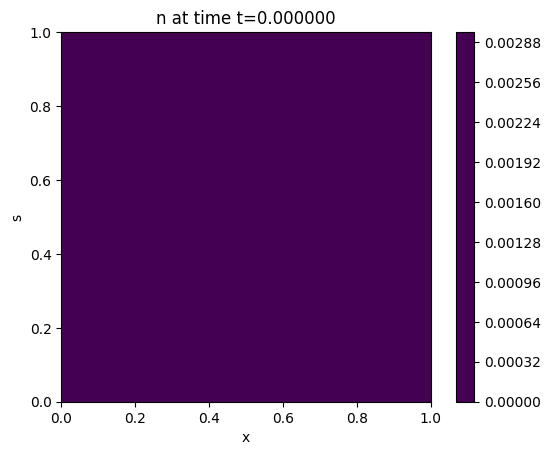

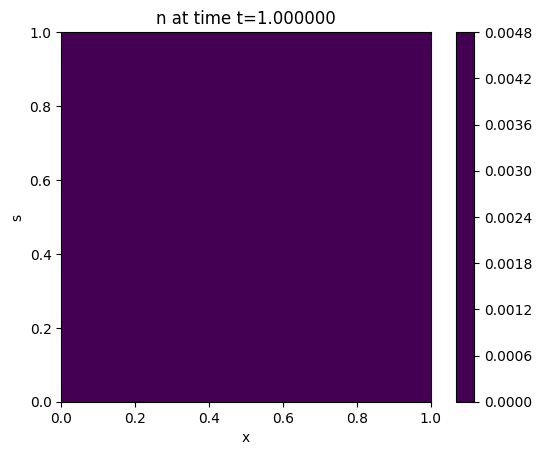

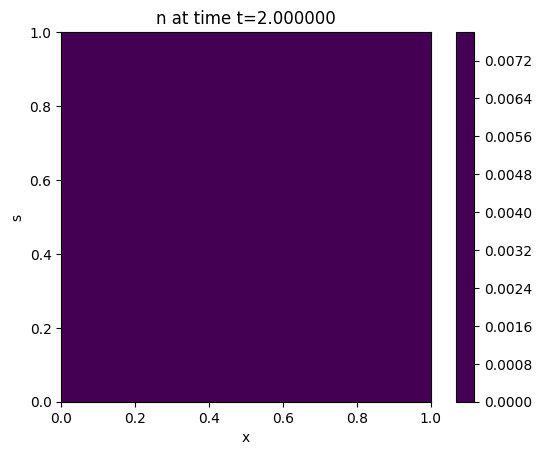

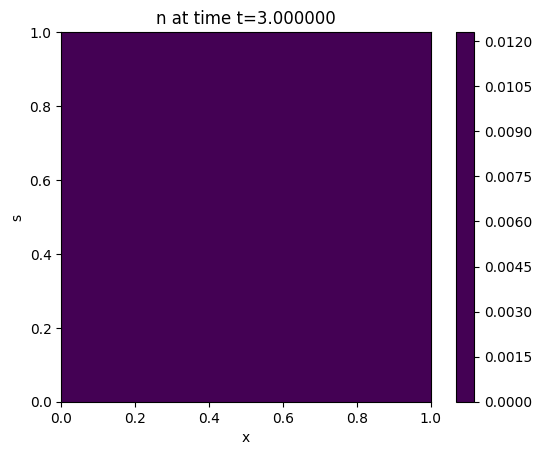

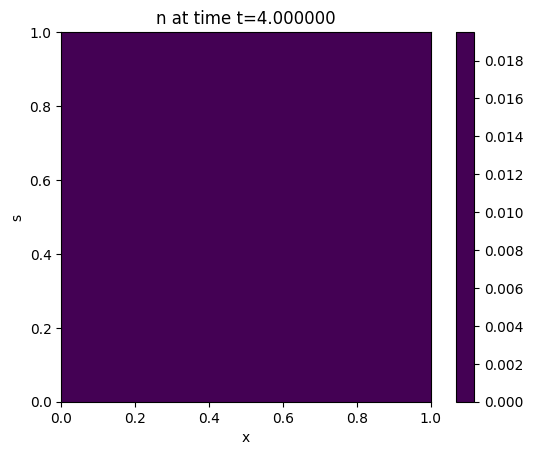

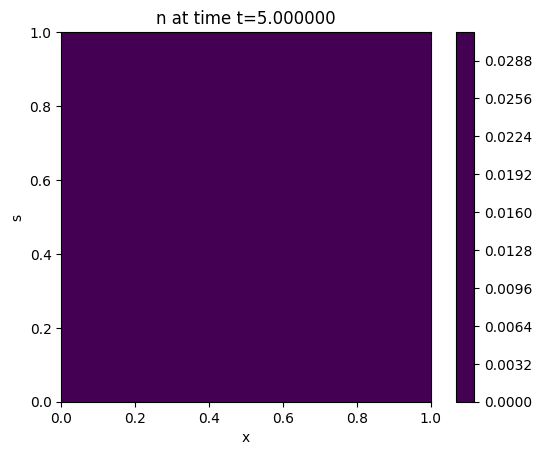

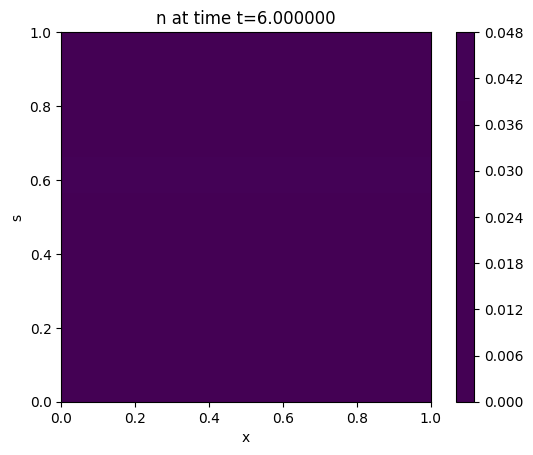

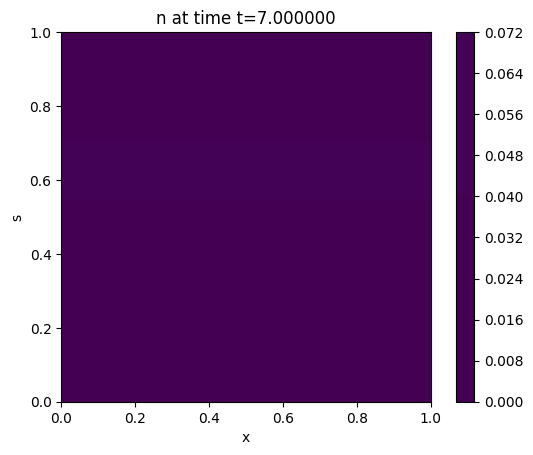

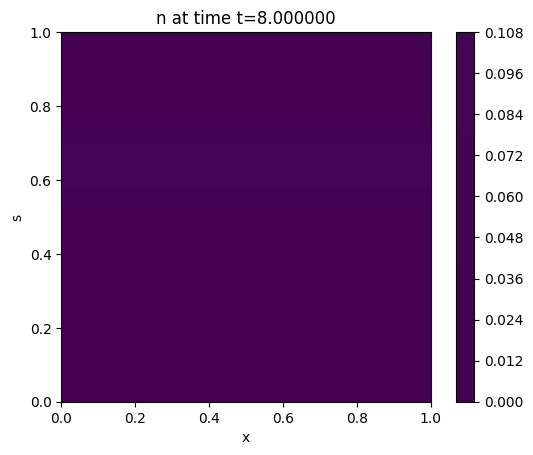

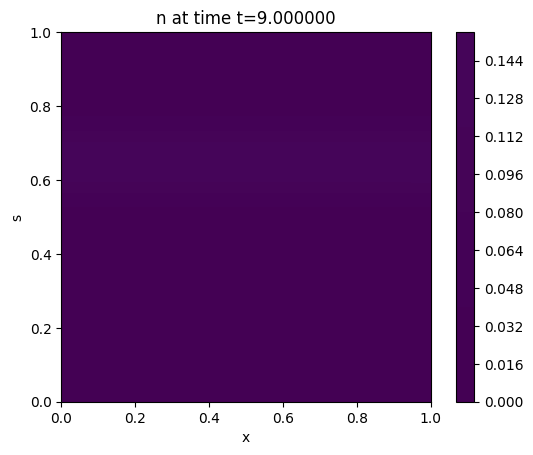

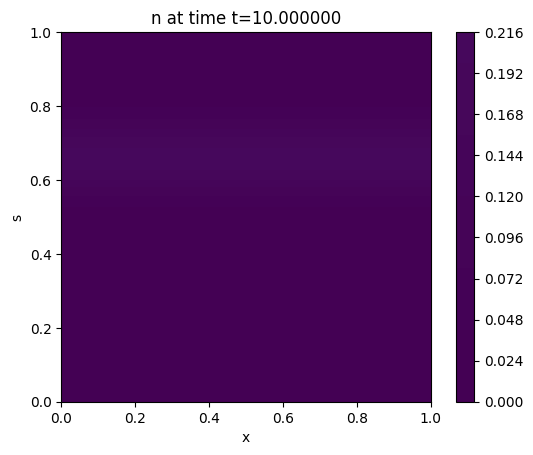

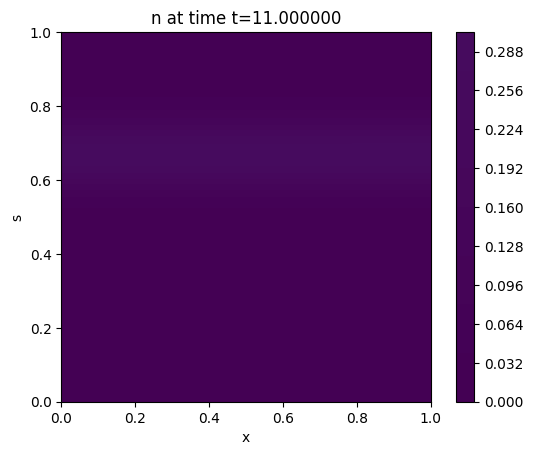

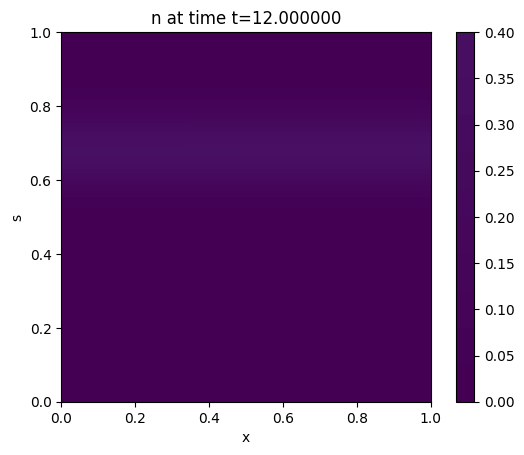

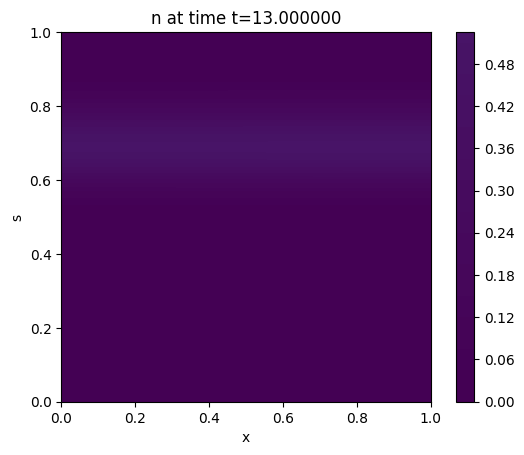

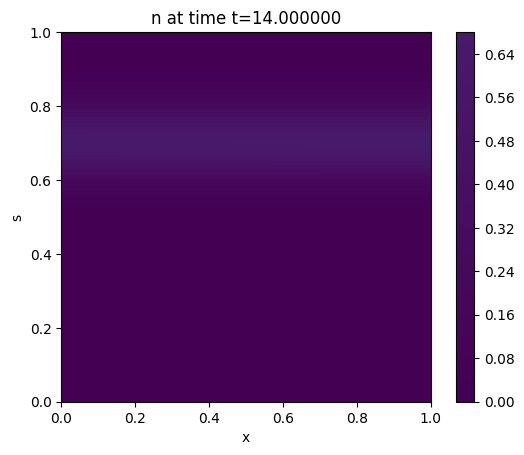

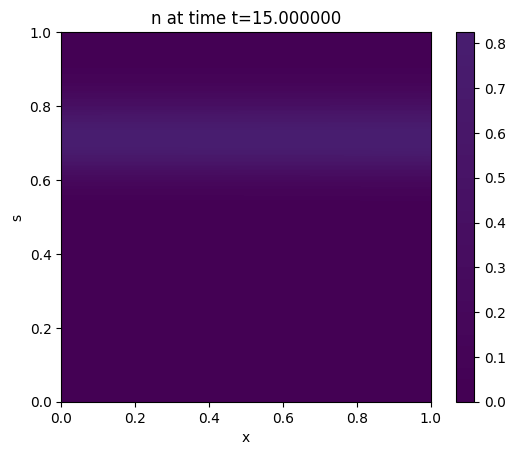

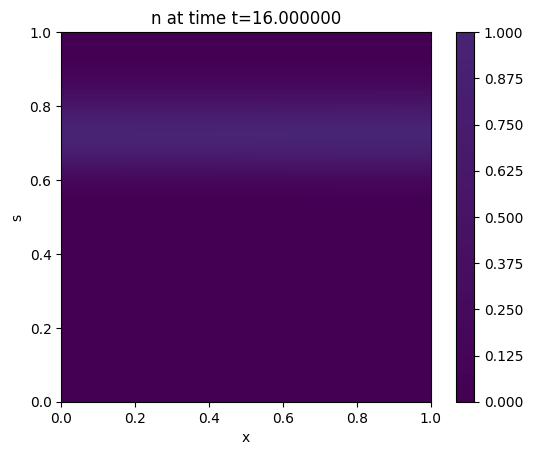

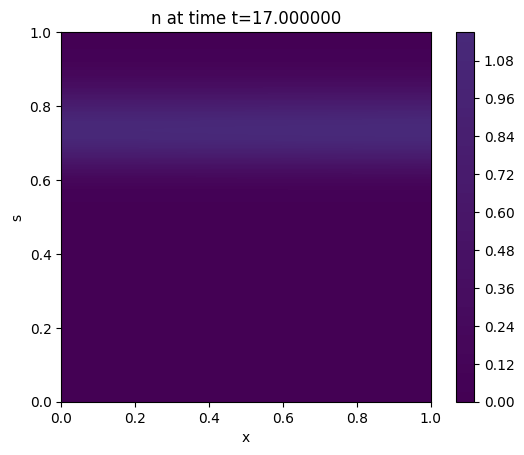

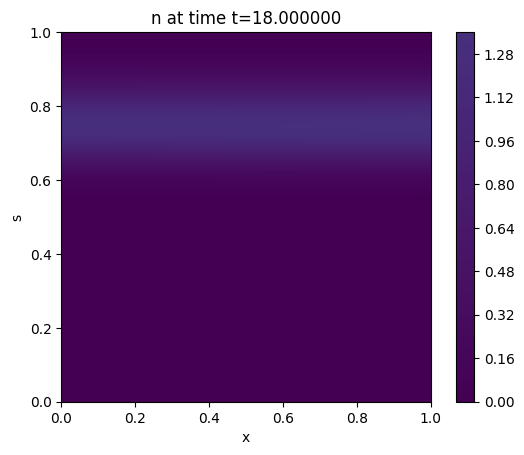

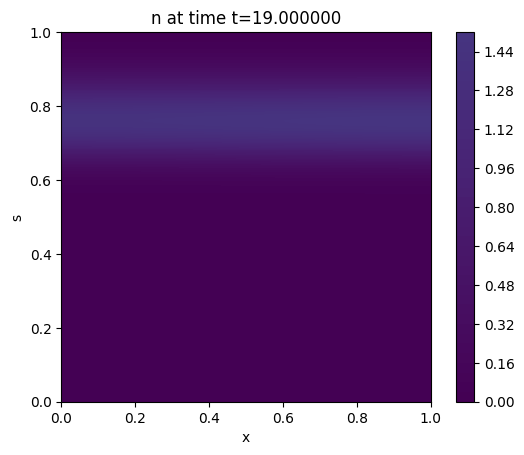

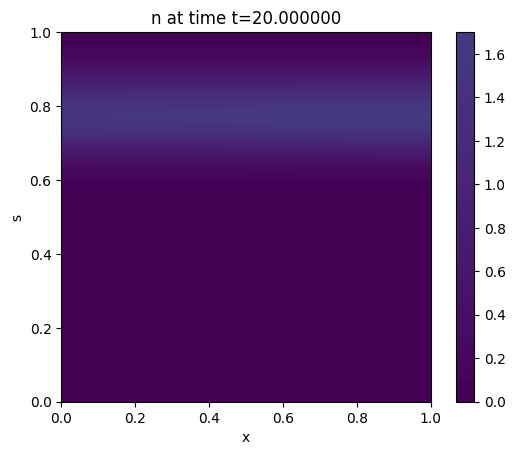

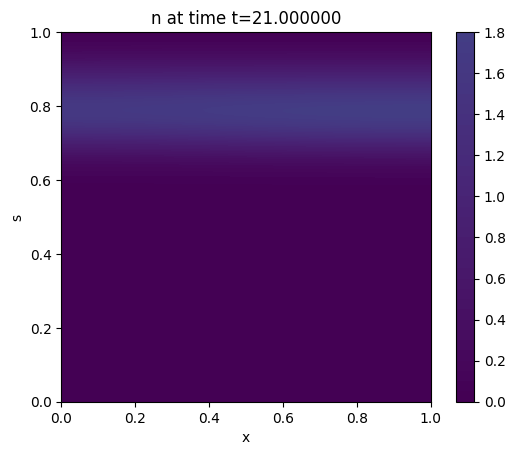

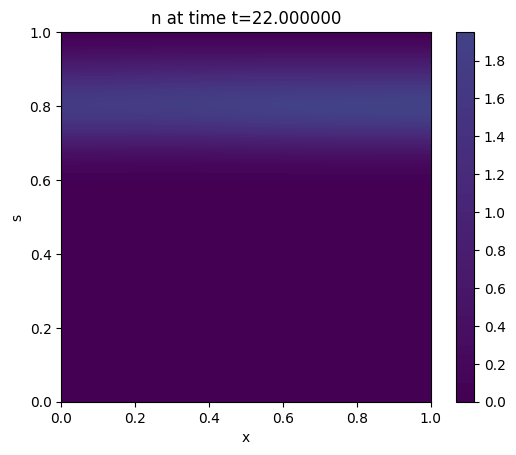

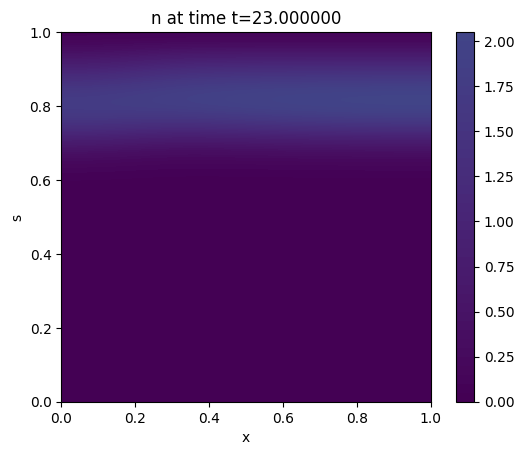

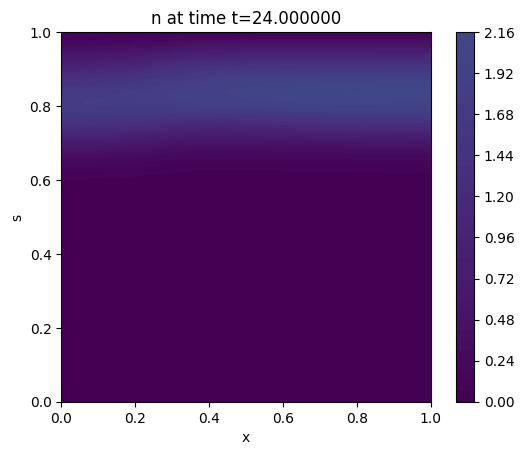

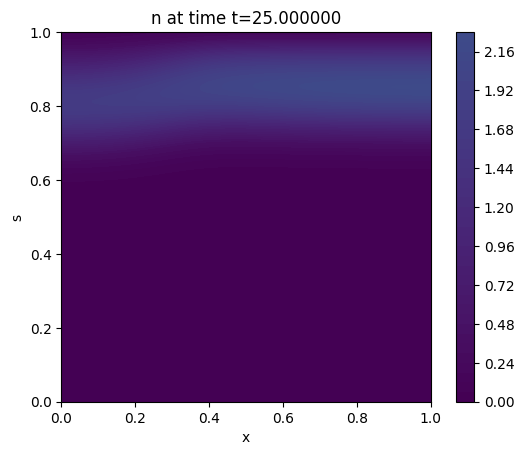

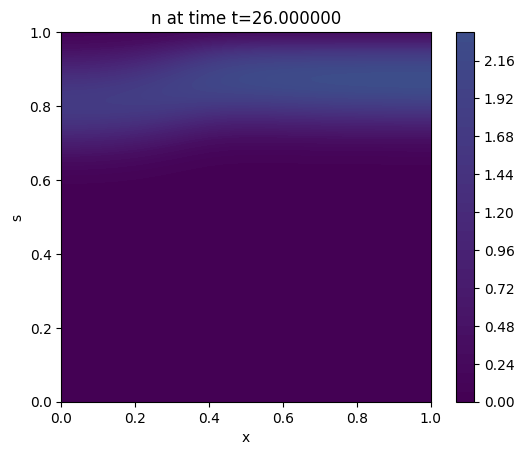

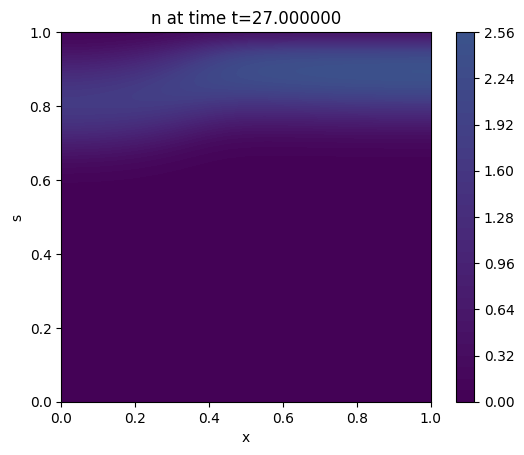

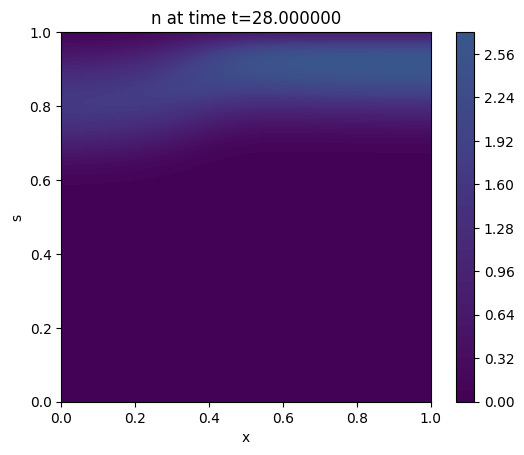

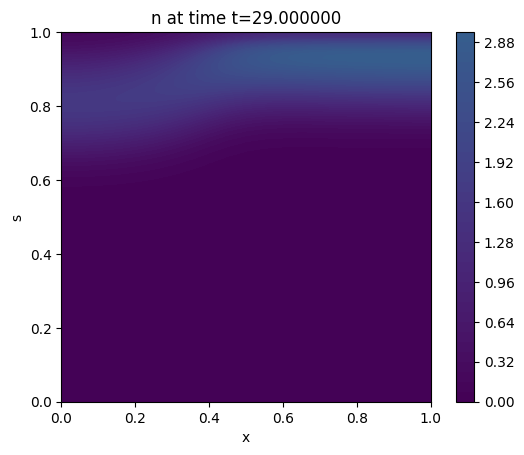

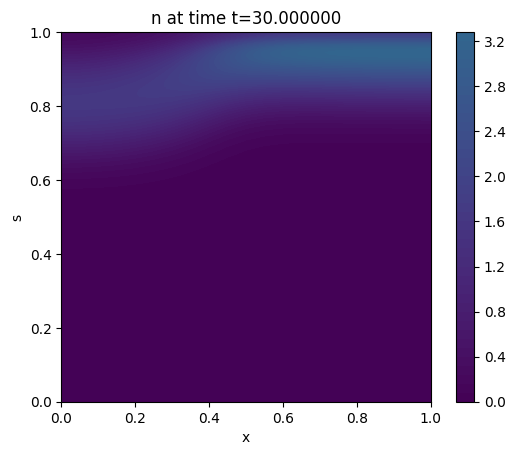

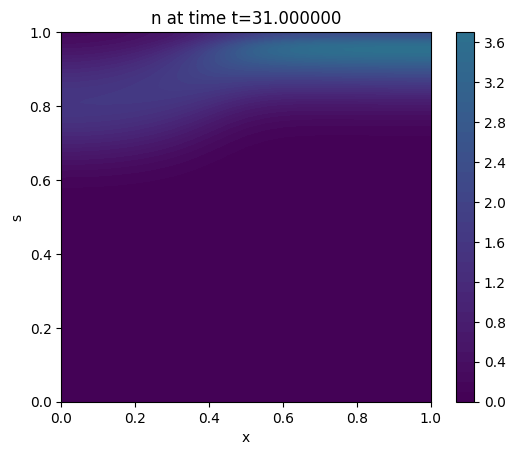

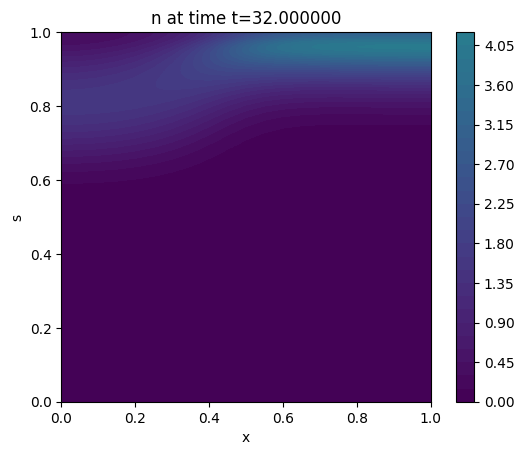

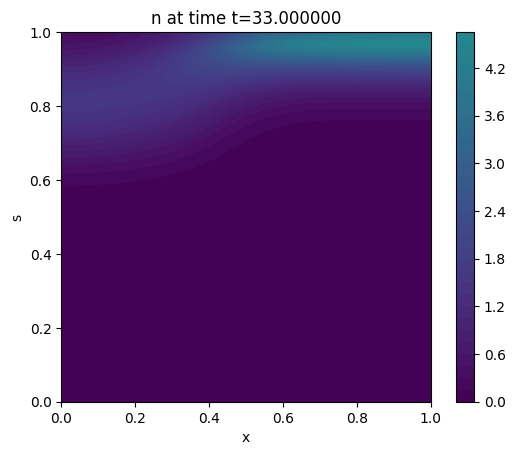

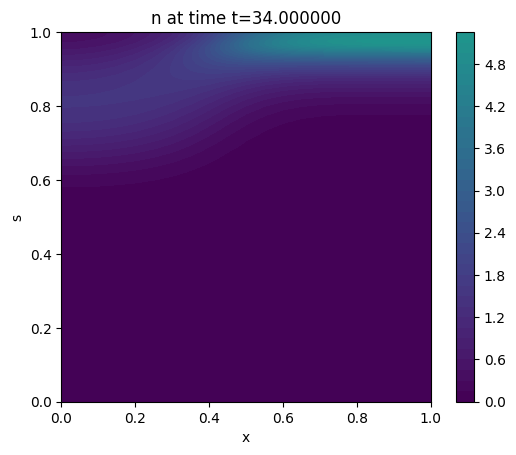

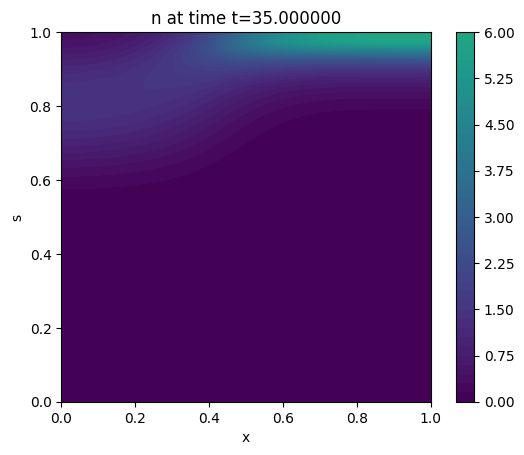

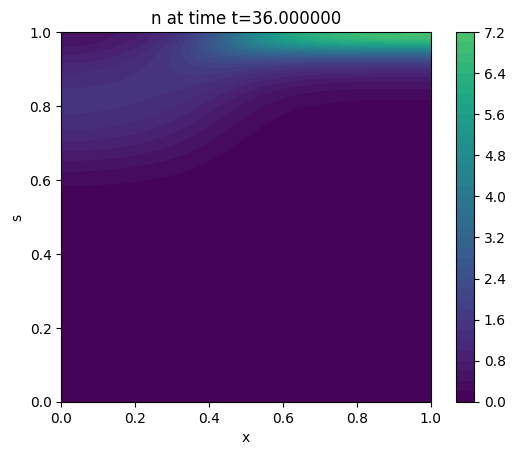

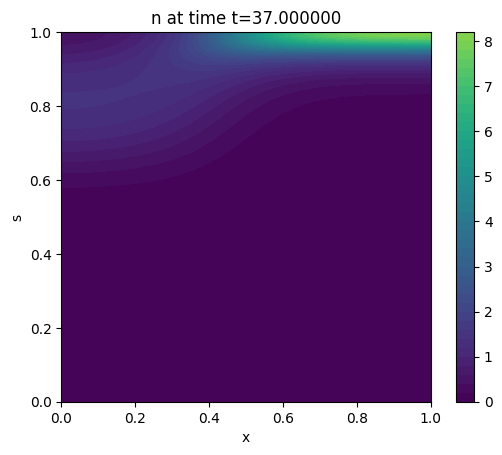

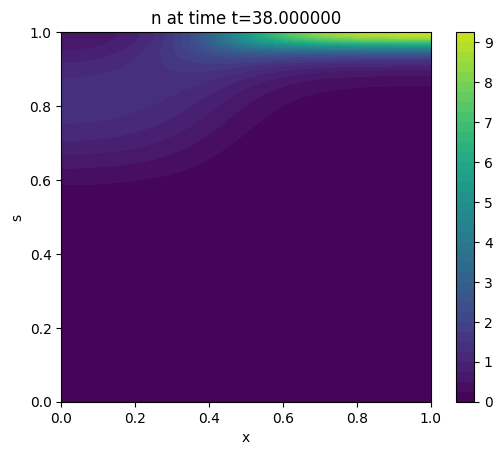

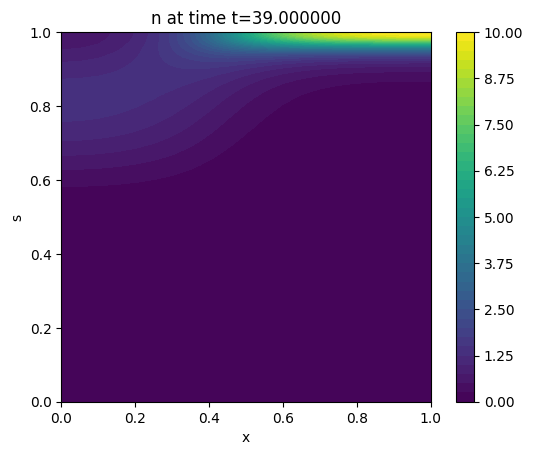

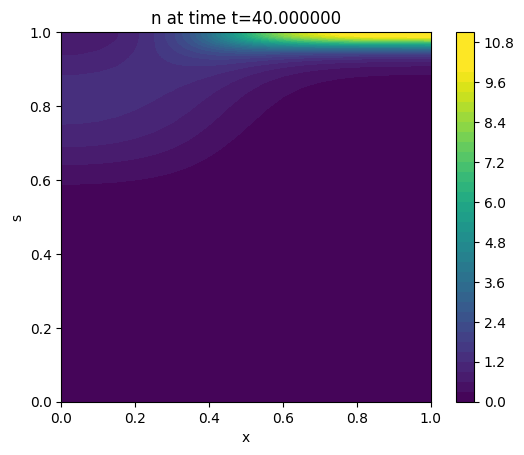

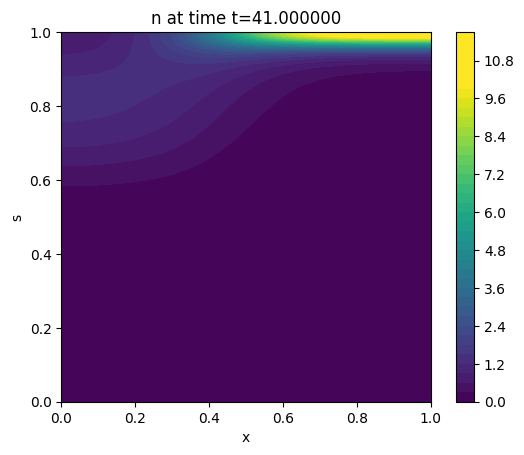

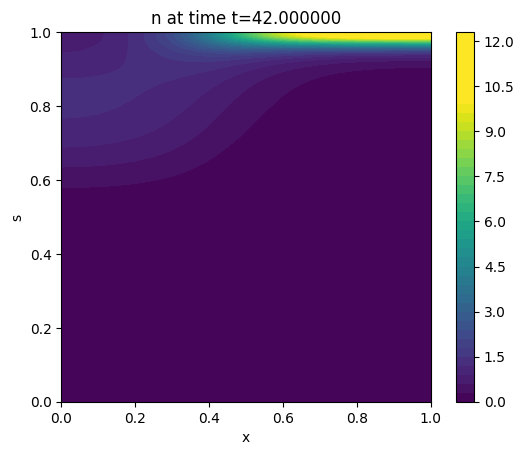

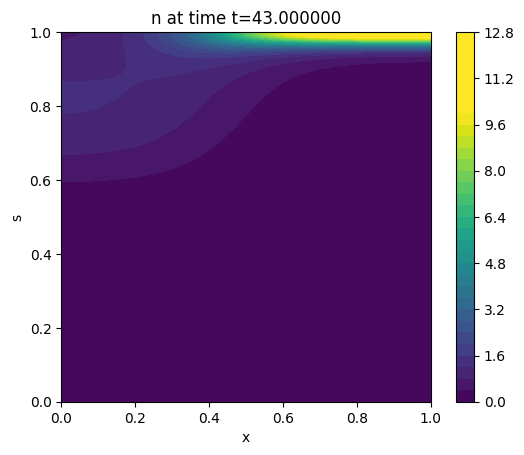

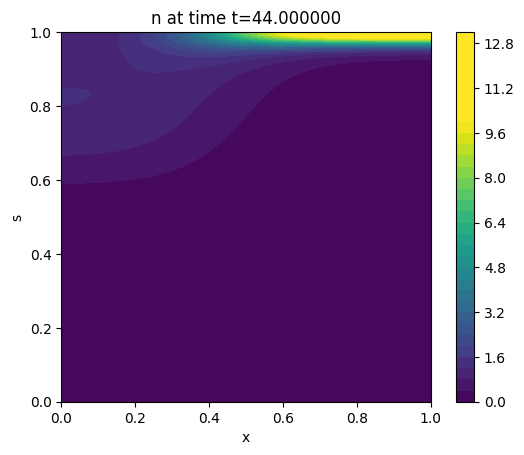

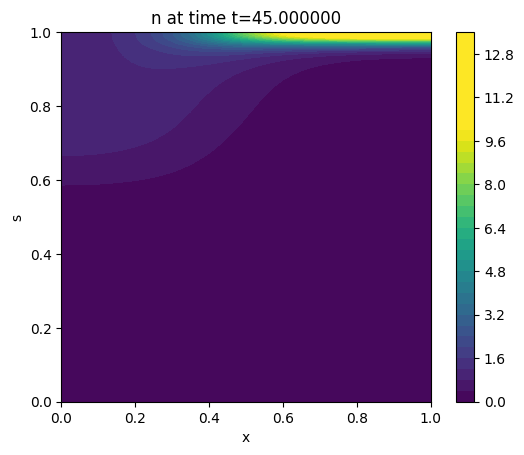

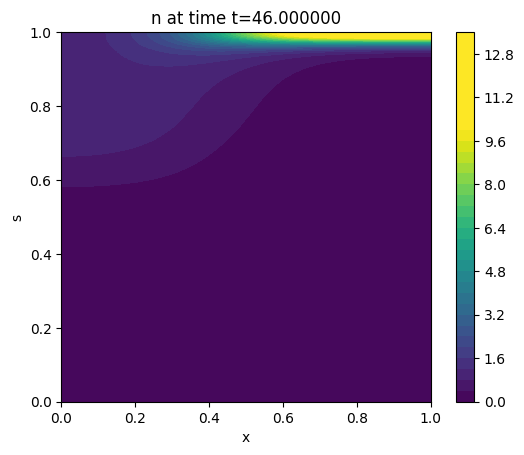

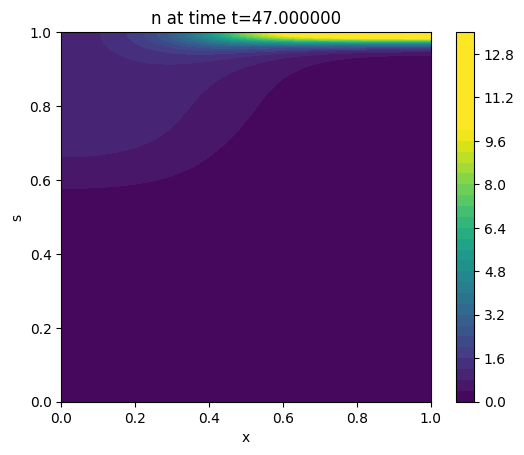

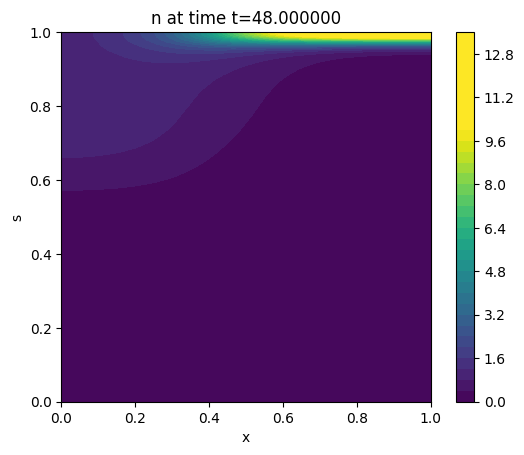

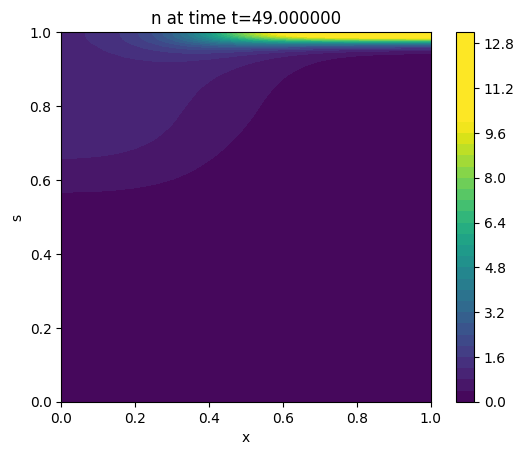

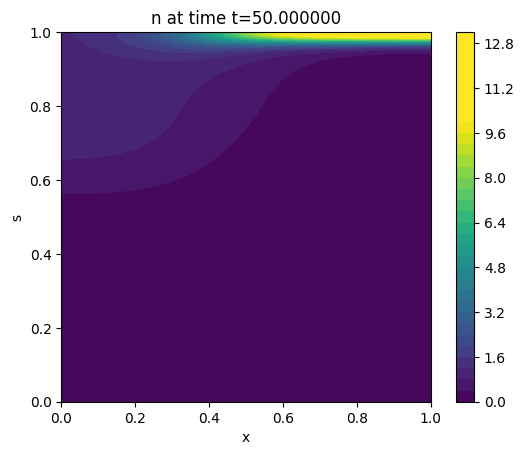

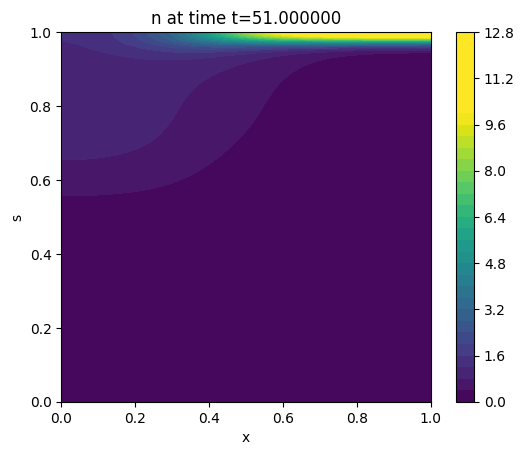

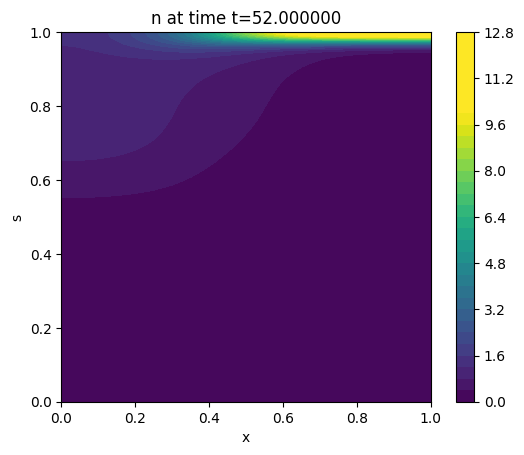

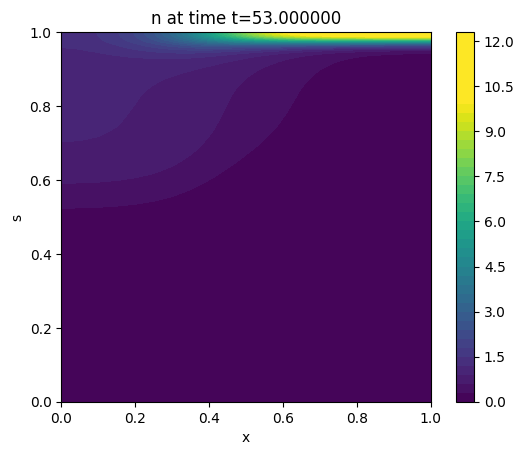

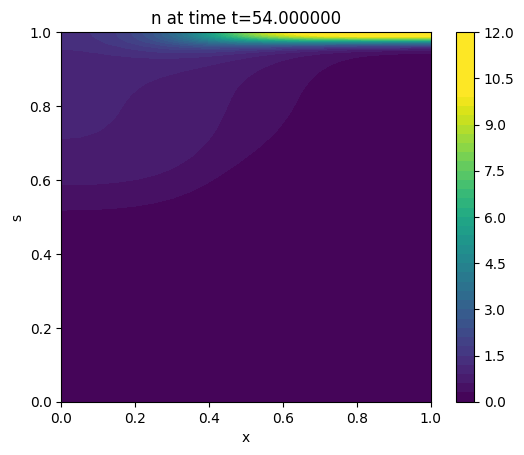

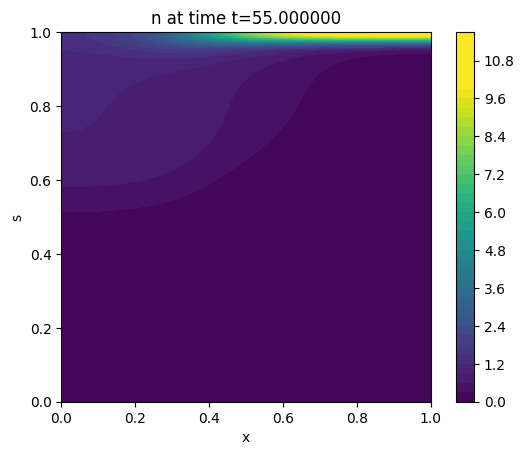

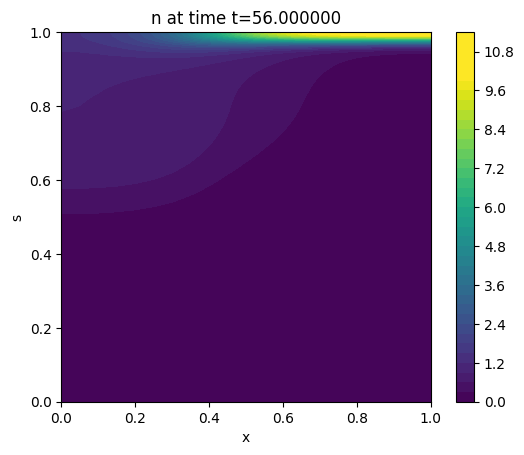

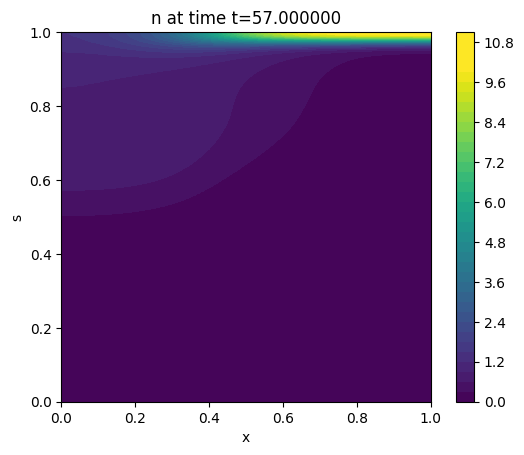

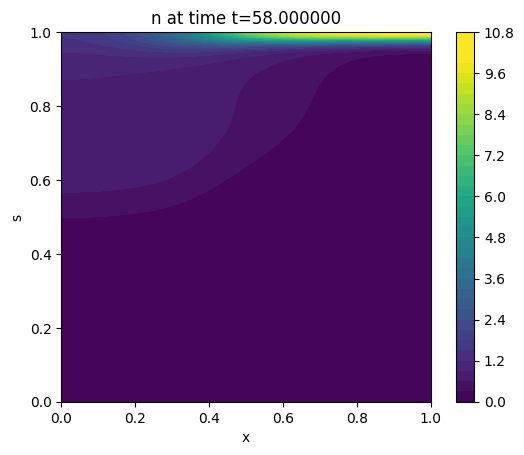

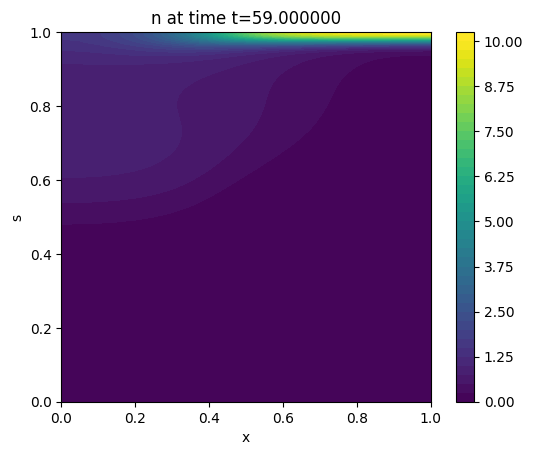

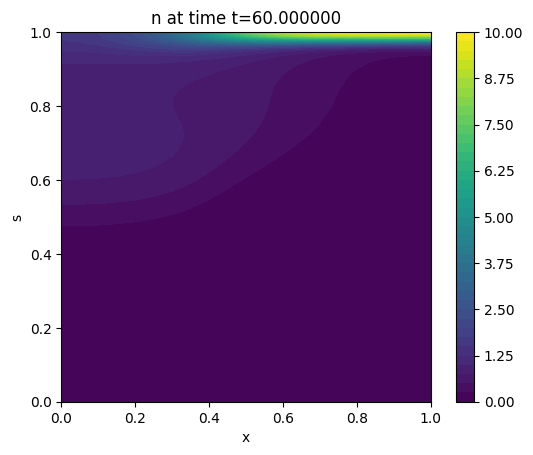

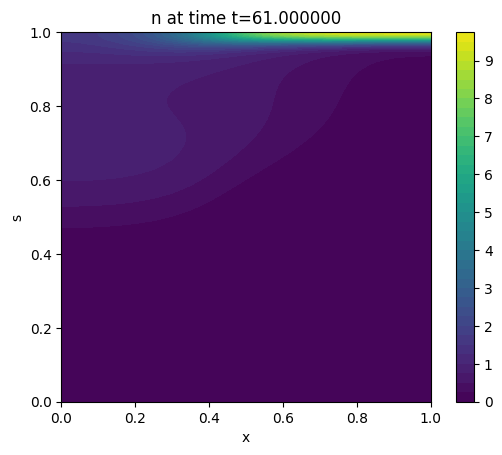

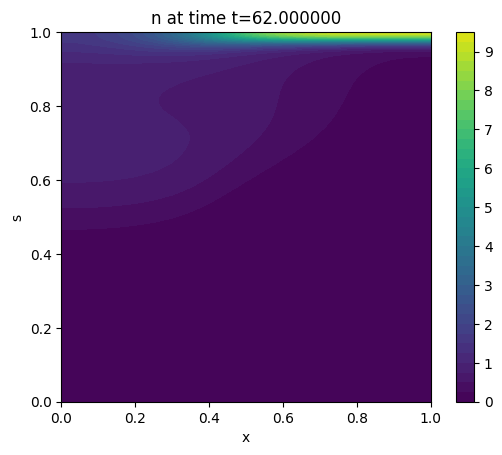

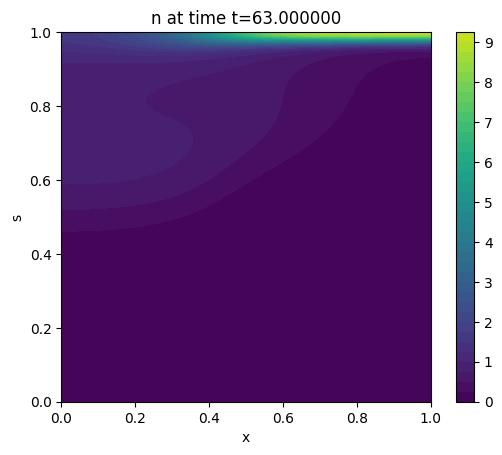

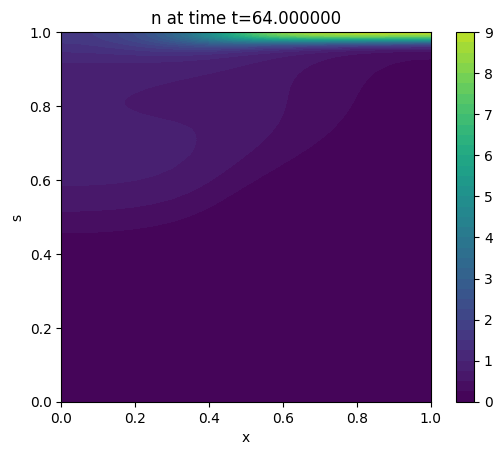

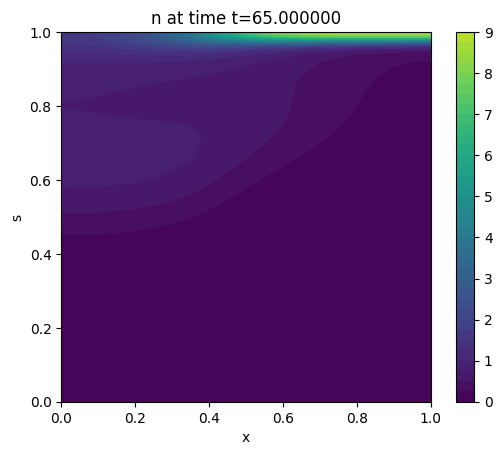

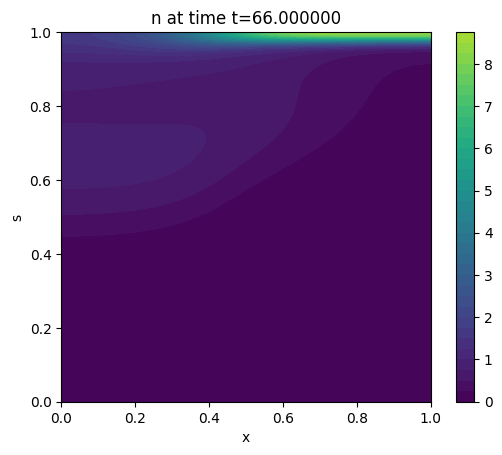

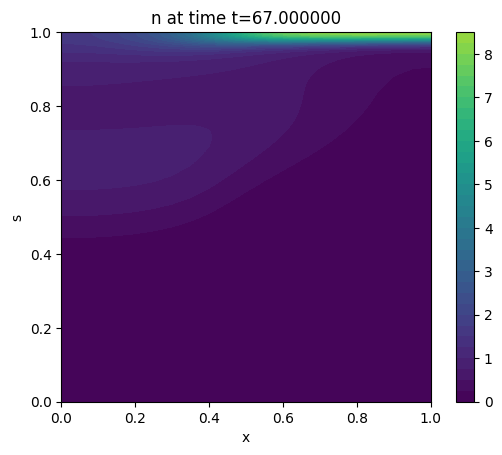

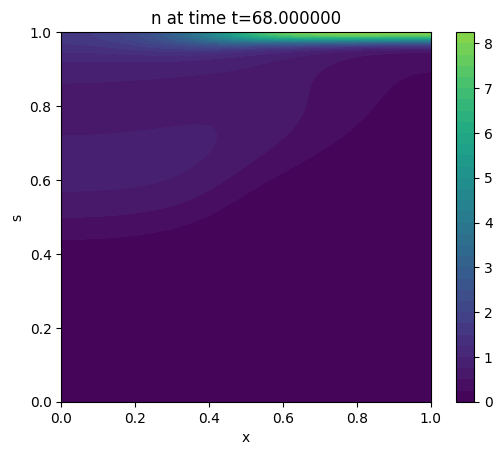

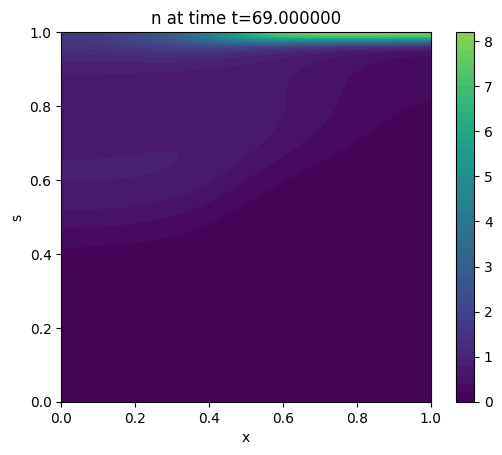

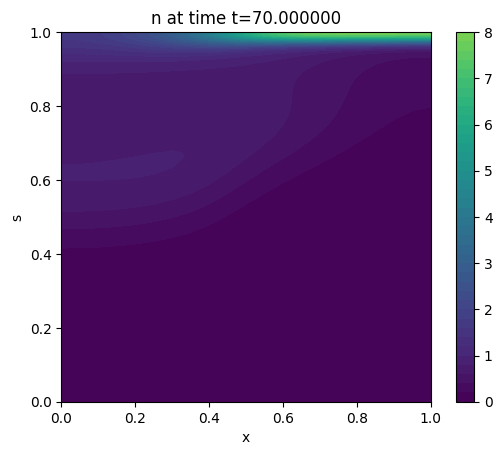

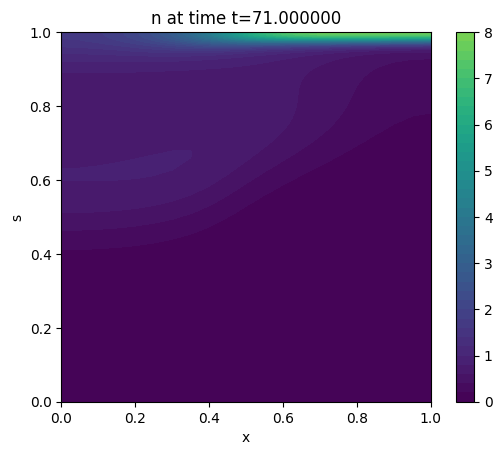

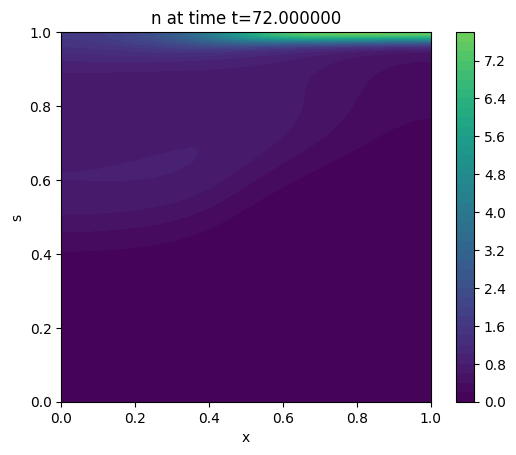

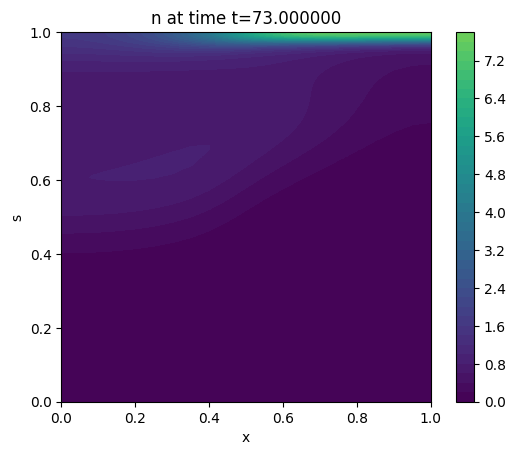

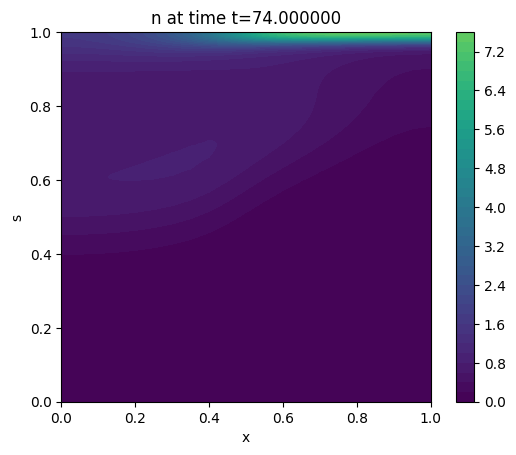

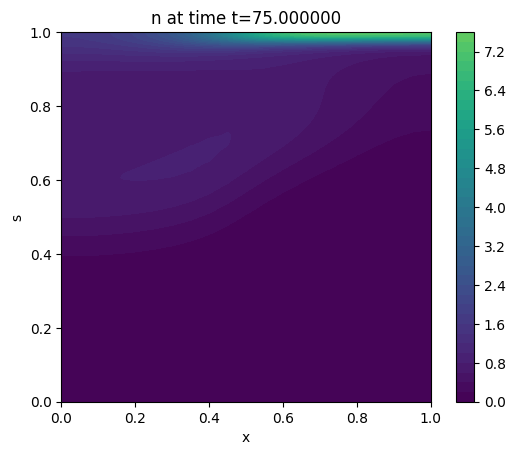

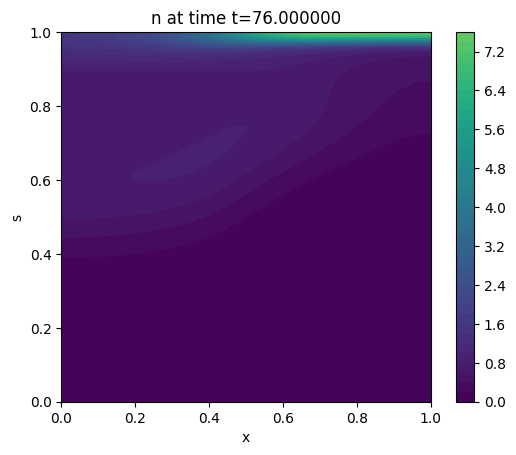

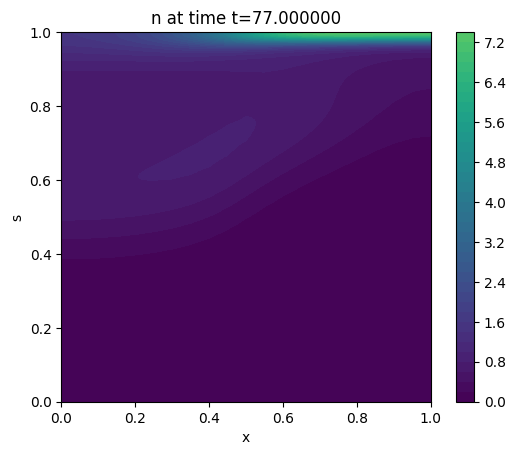

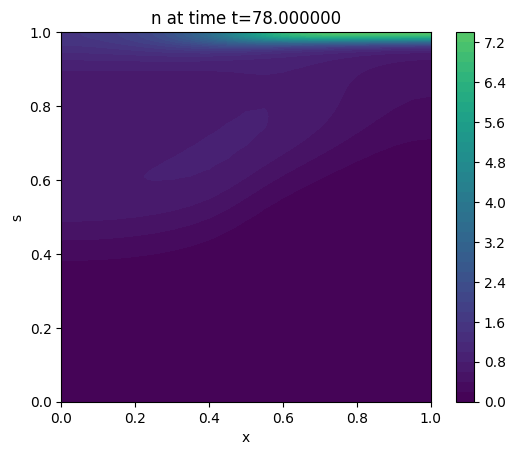

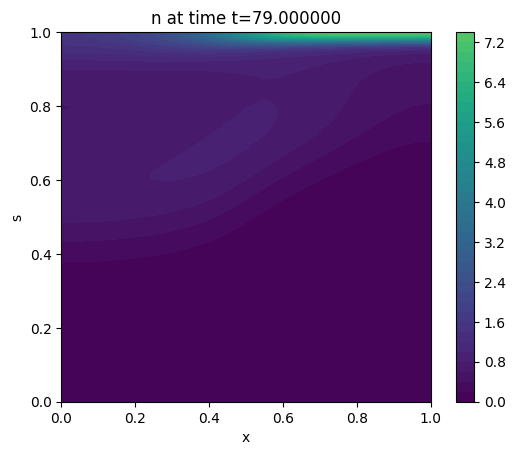

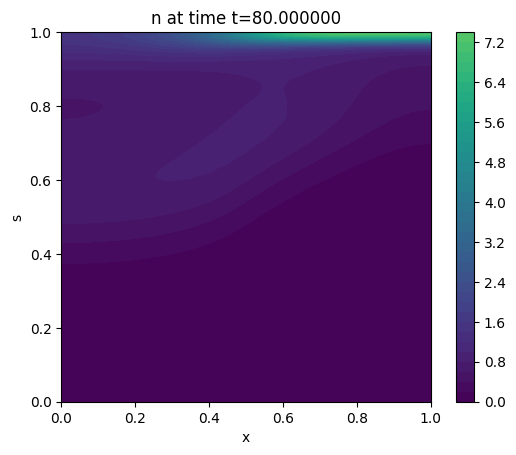

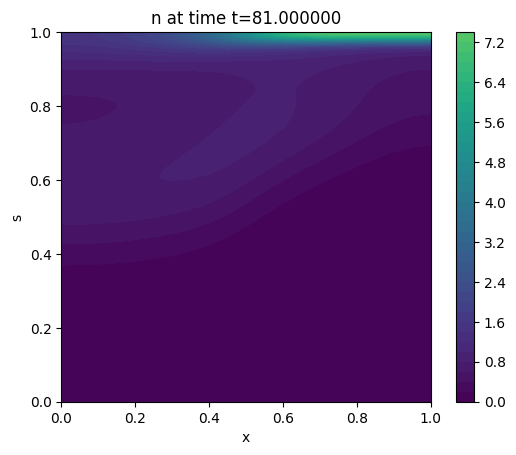

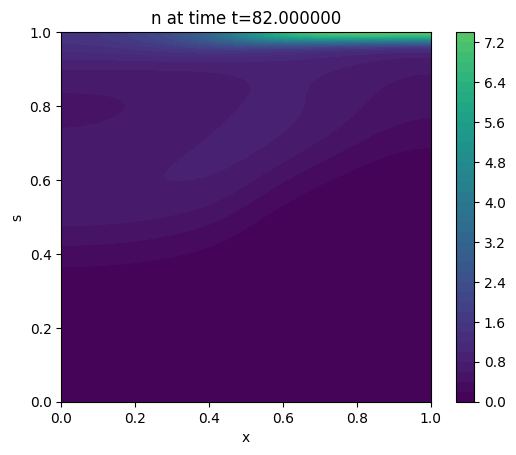

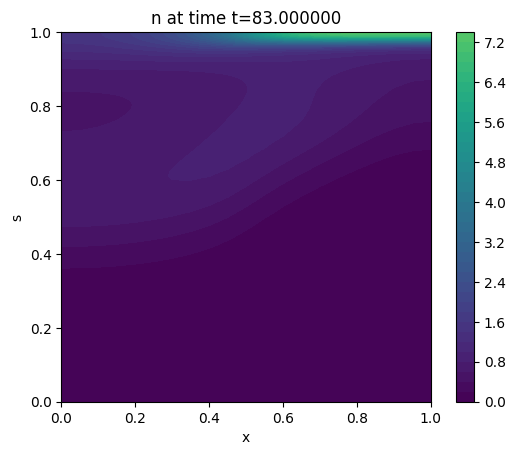

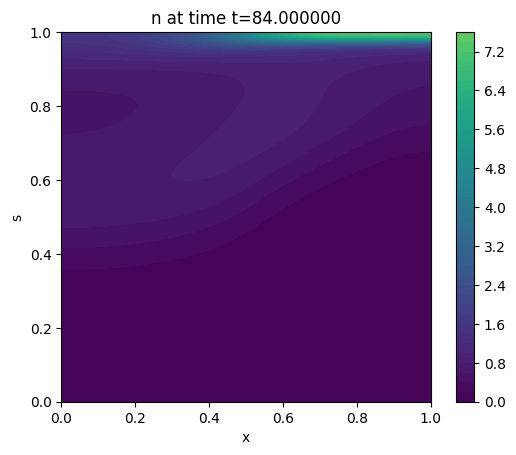

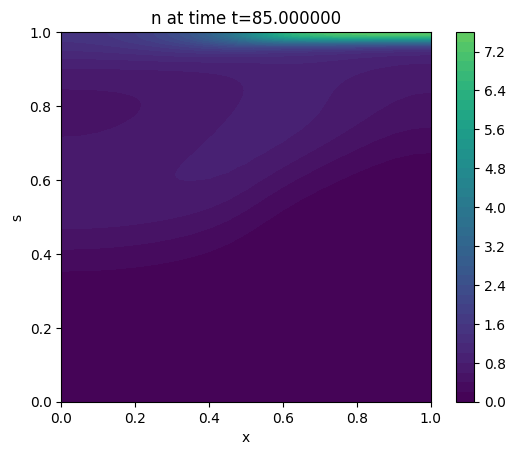

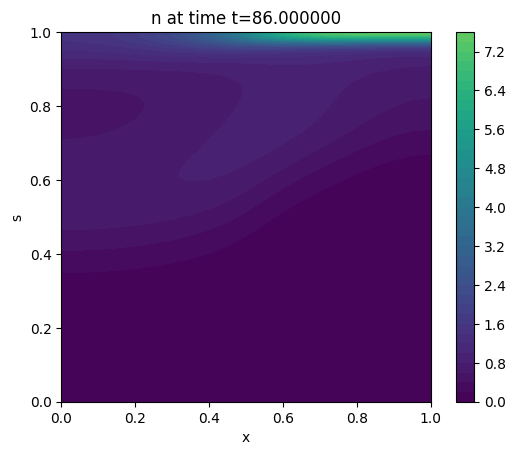

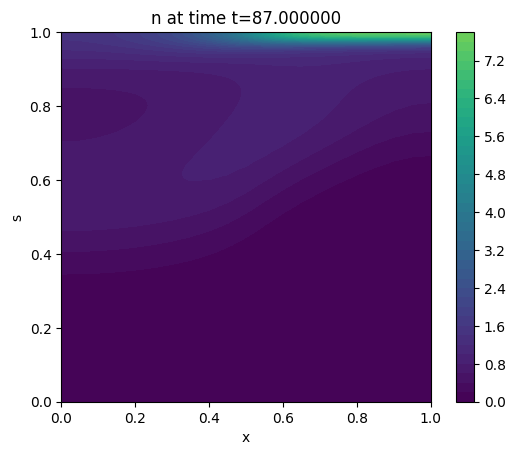

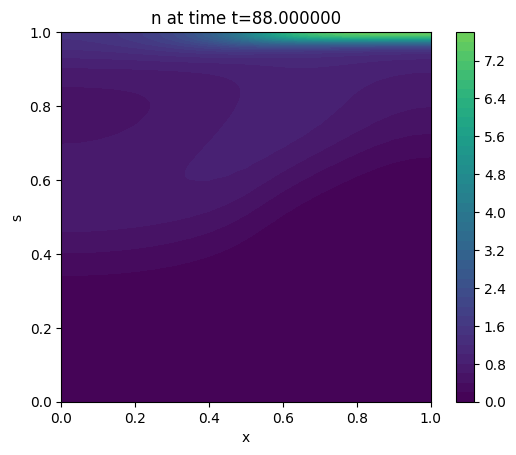

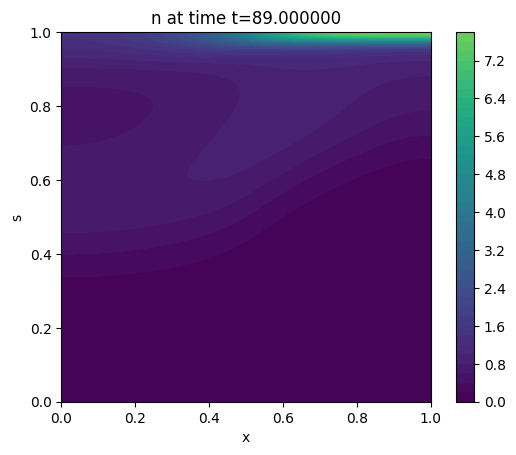

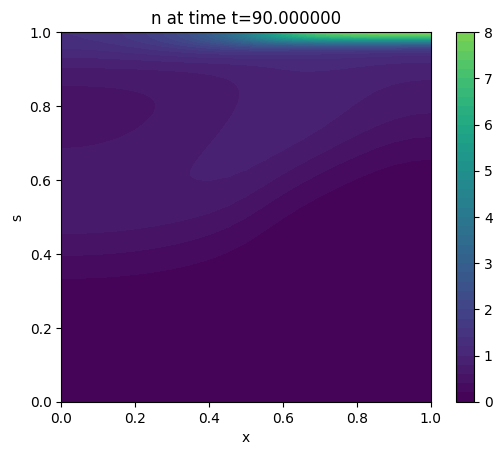

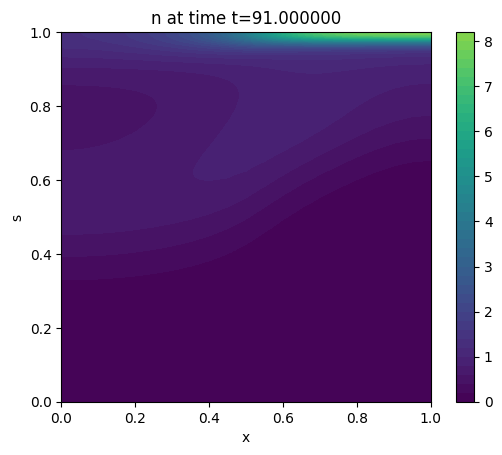

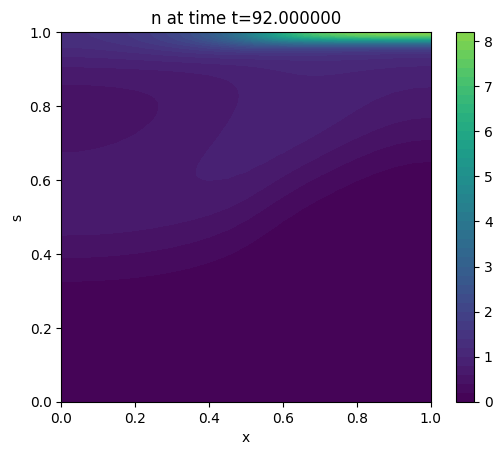

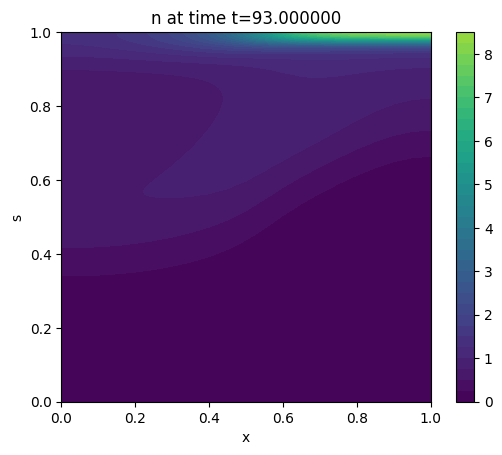

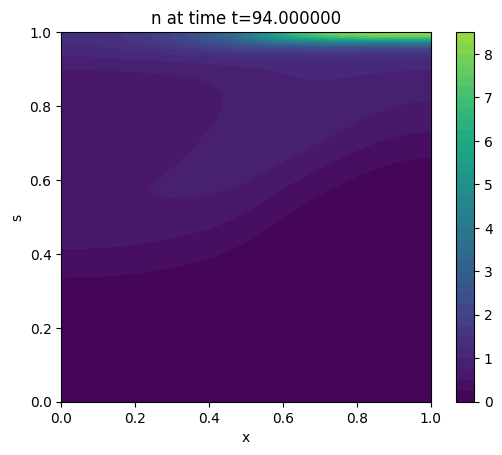

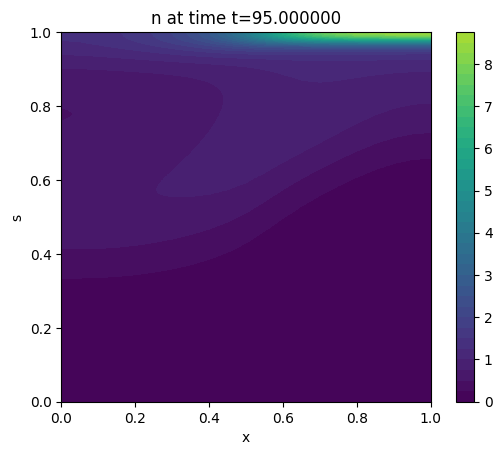

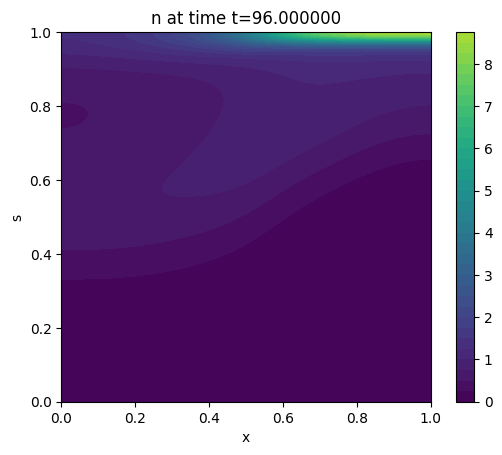

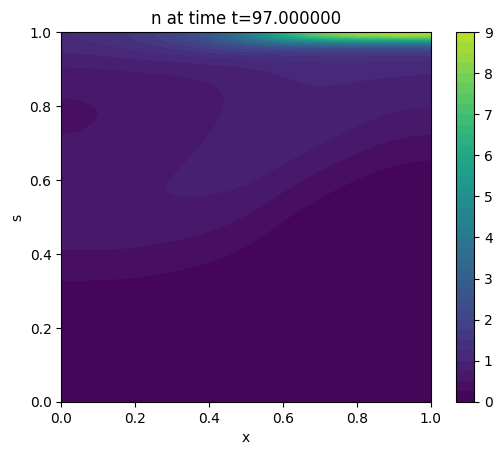

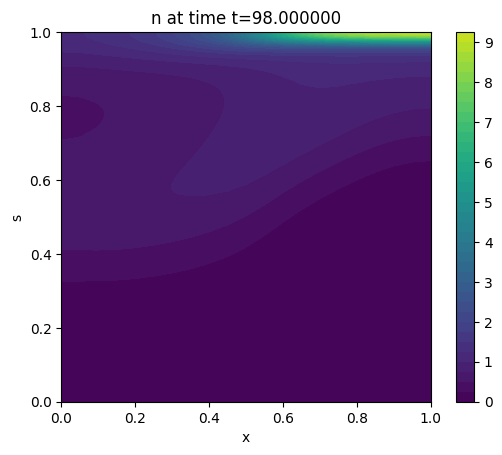

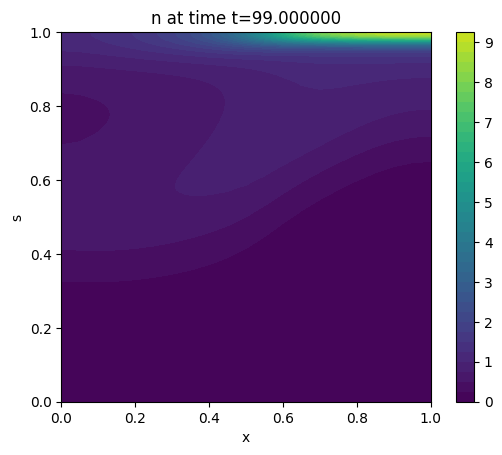

In [6]:
# cell distribution test case 1
V = FunctionSpace(mesh,"P",1)
n = Function(V)
nfile = XDMFFile('../Model3D/solutions/test1D_ds0.005/n.xdmf')
for i in range(100):
#for i in range(int(T/dt)//save_interval + 1):
    nfile.read_checkpoint(n,"n",i)
    sol = plot(n,vmax=10)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %i)# %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()

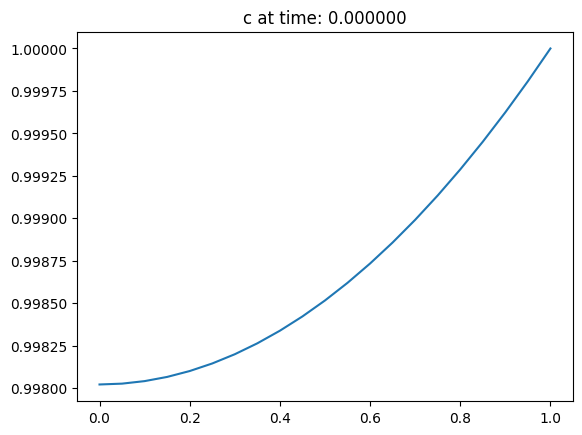

0.9980204886971736


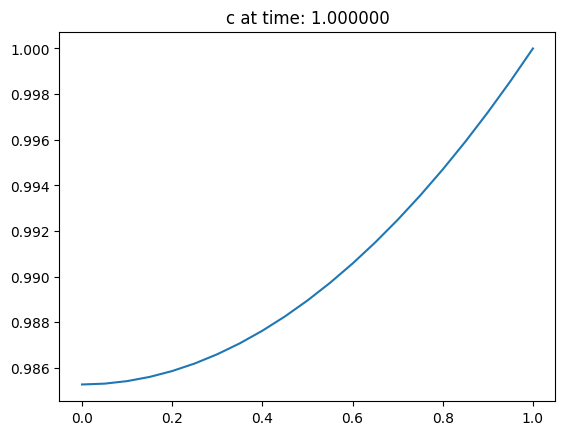

0.9852743729024309


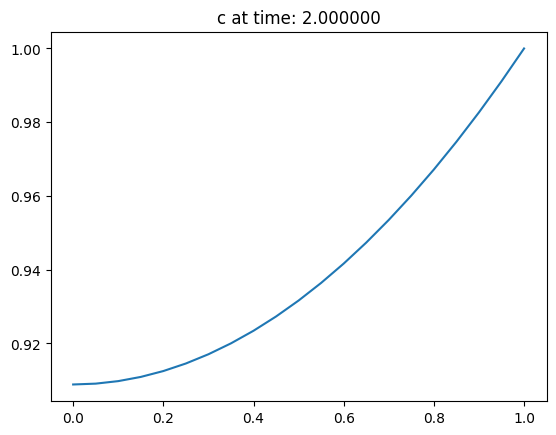

0.9088623876218803


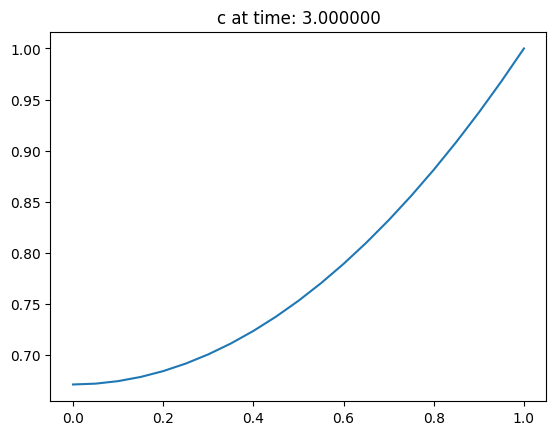

0.6709327976696073


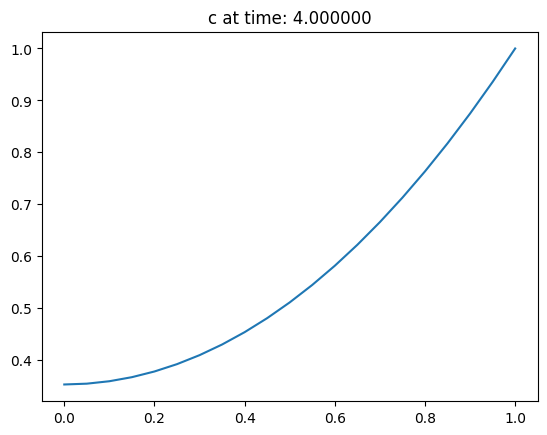

0.35256670273556096


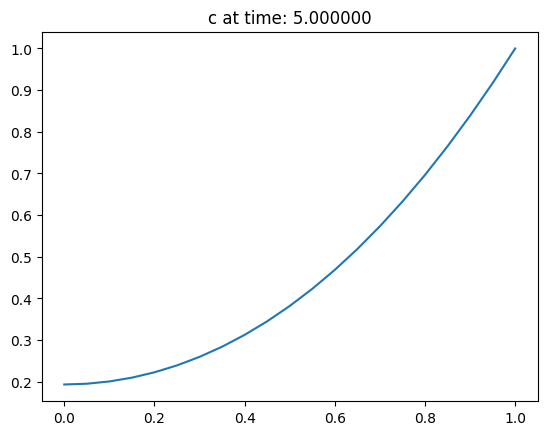

0.1934264843172365


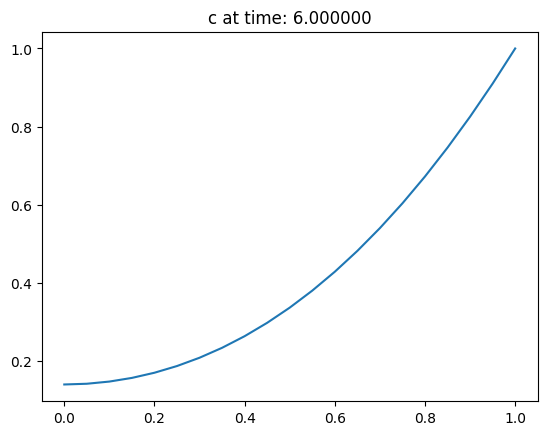

0.13975234568902467


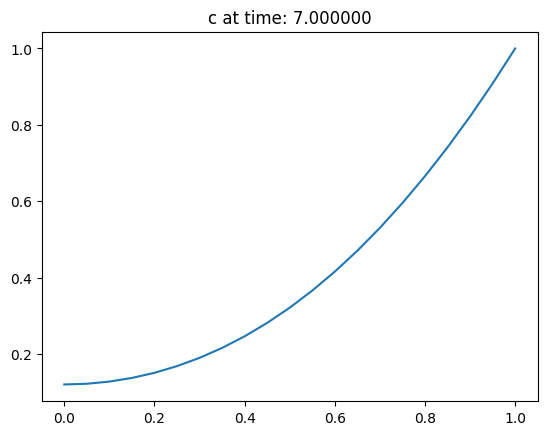

0.1206164918810123


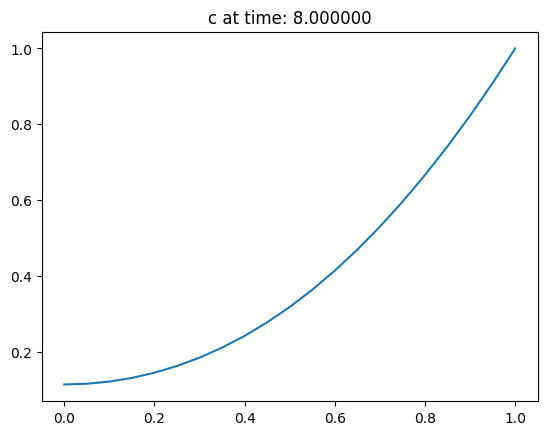

0.11319233737342162


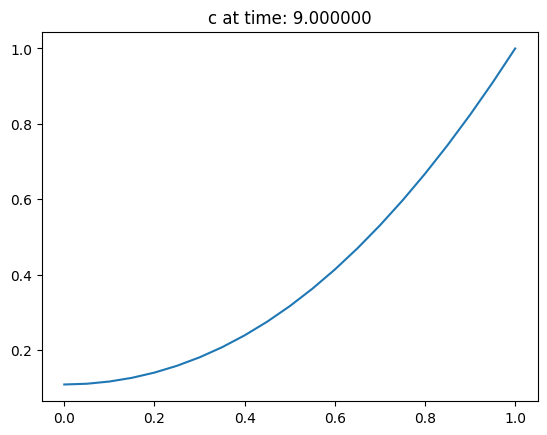

0.10859979231924803


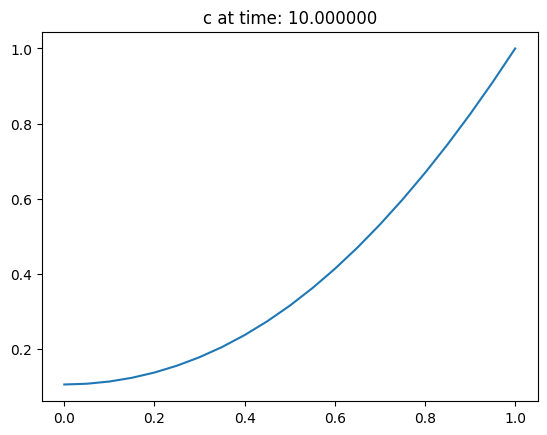

0.10430388001256982


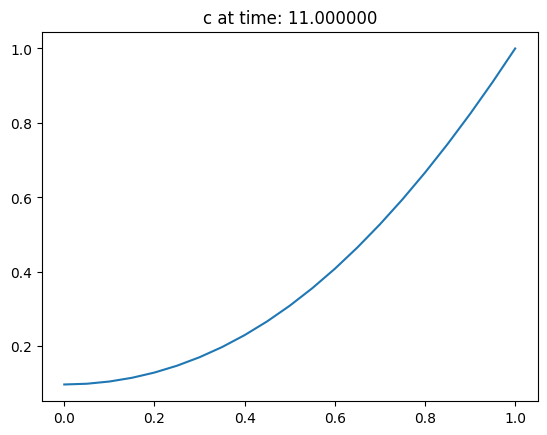

0.09744477564479538


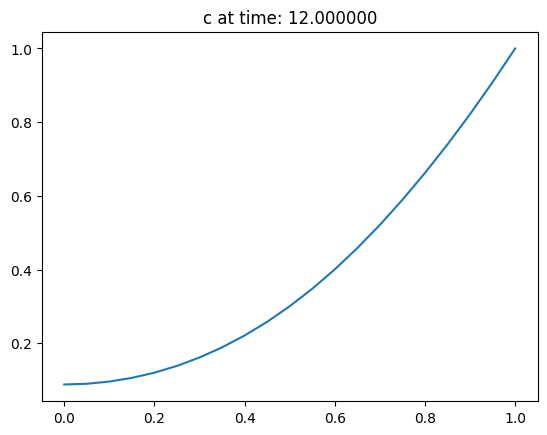

0.08829882814496073


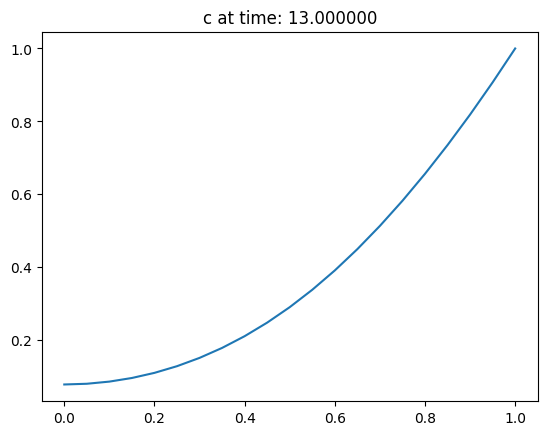

0.07816308055638467


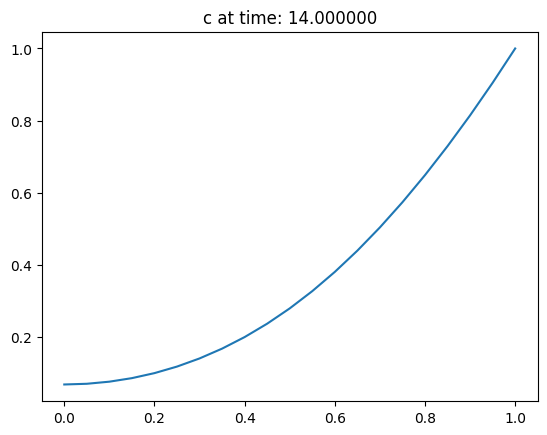

0.0675238768275473


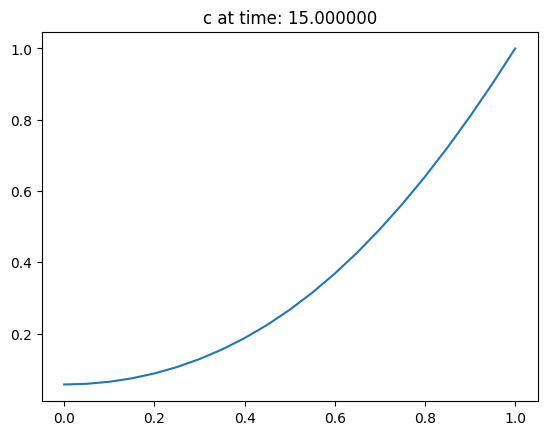

0.057277869155135844


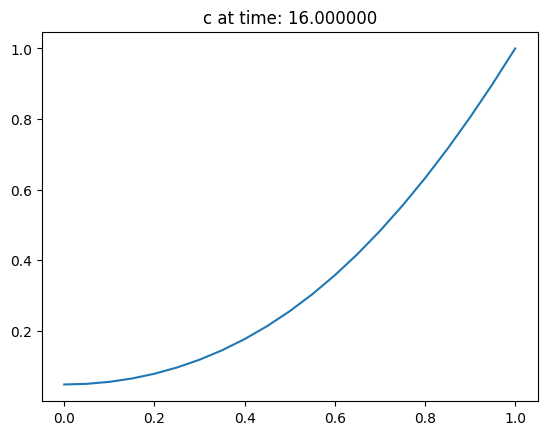

0.04825890255928926


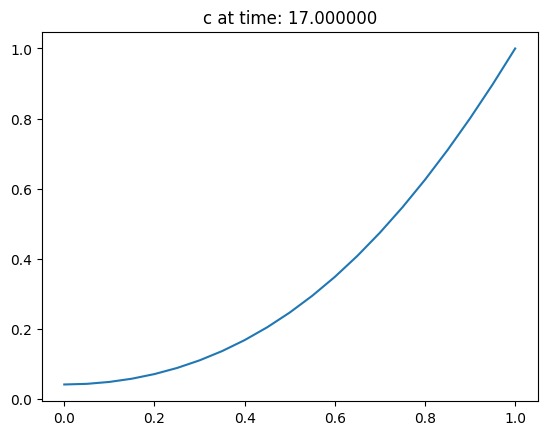

0.041537672196854794


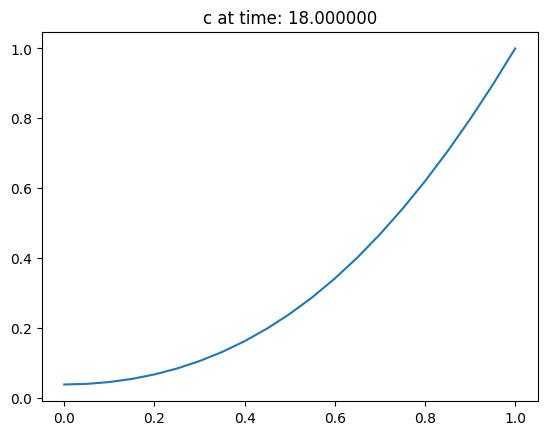

0.03733433096080356


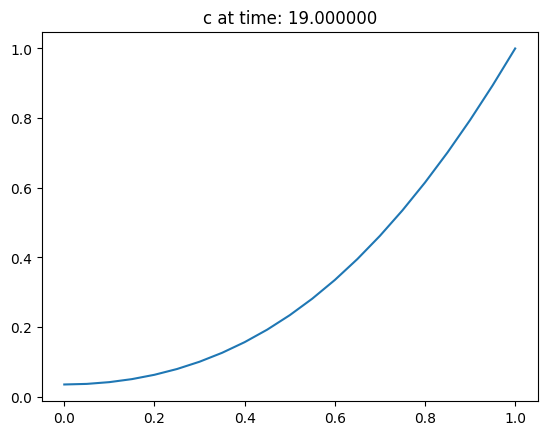

0.035315336443700544


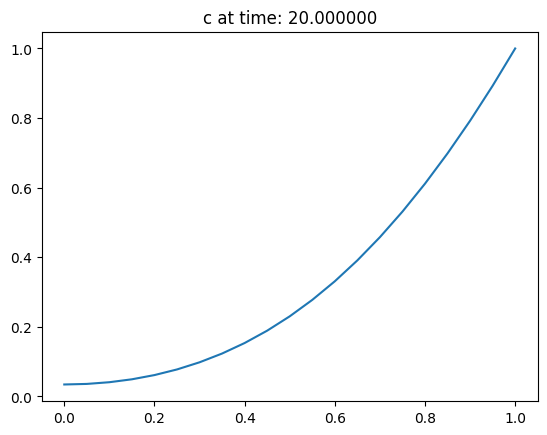

0.03450013710709794


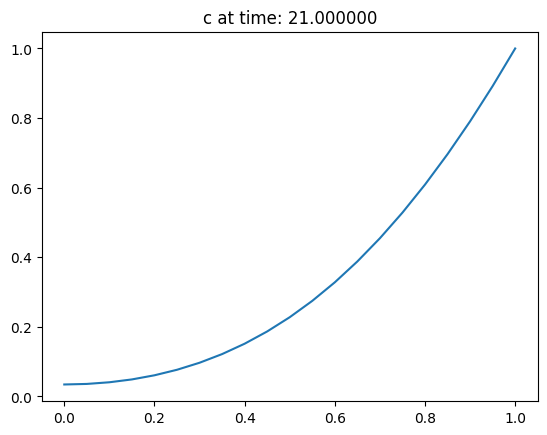

0.03432549197522552


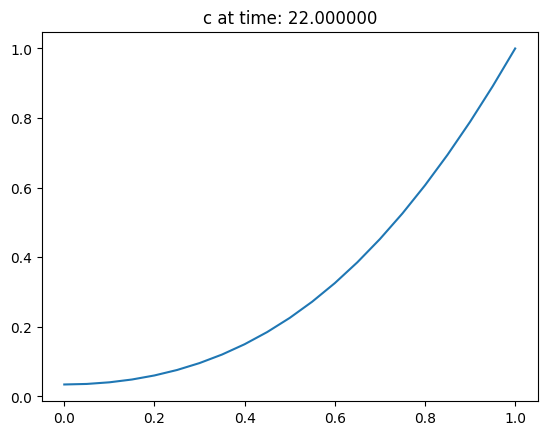

0.03424701701651218


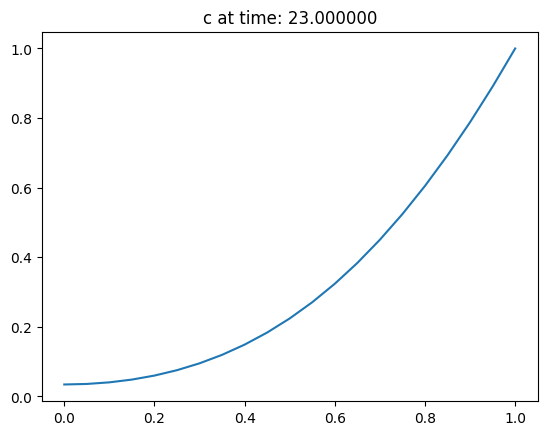

0.034148699760113053


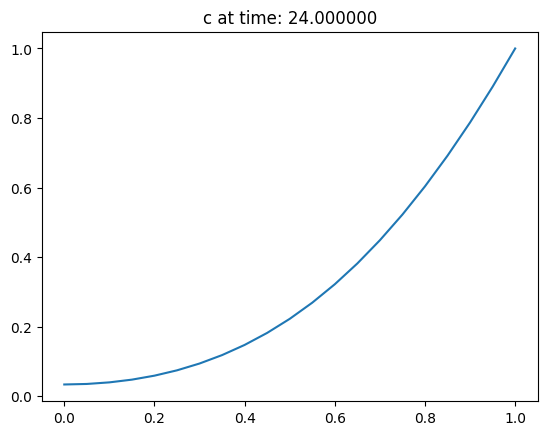

0.034025828019784335


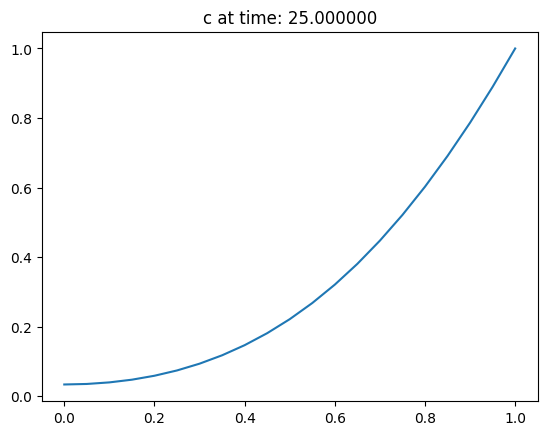

0.03387888200795659


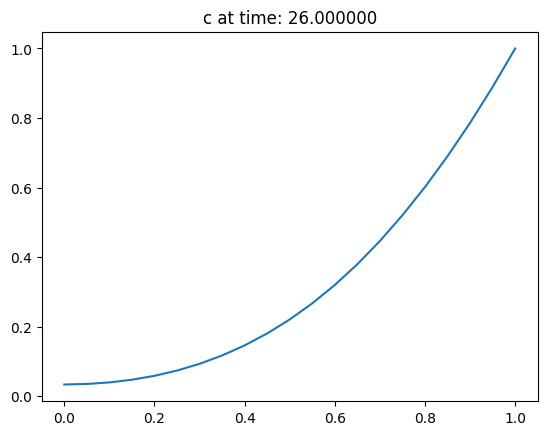

0.03370780383140123


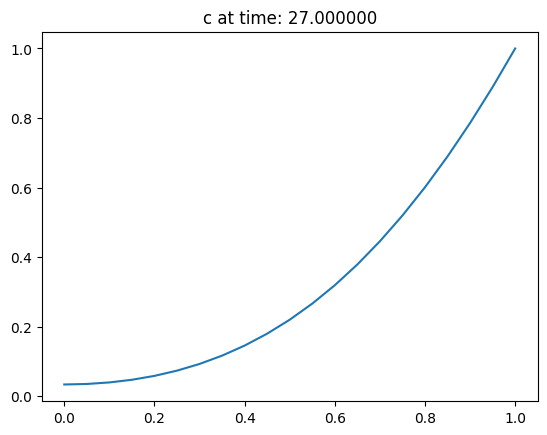

0.03351434098396203


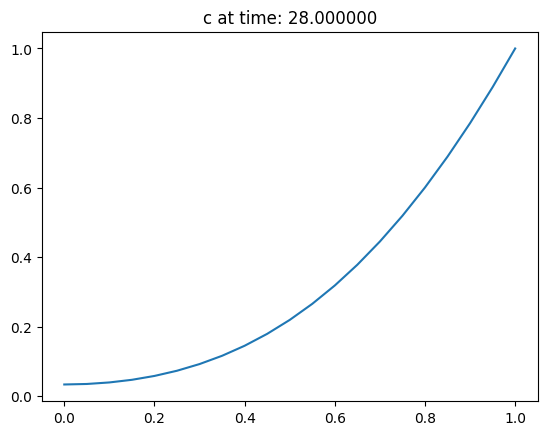

0.03330155423631085


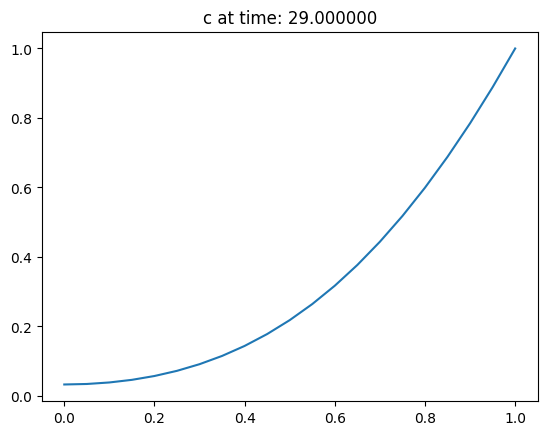

0.0330730311201419


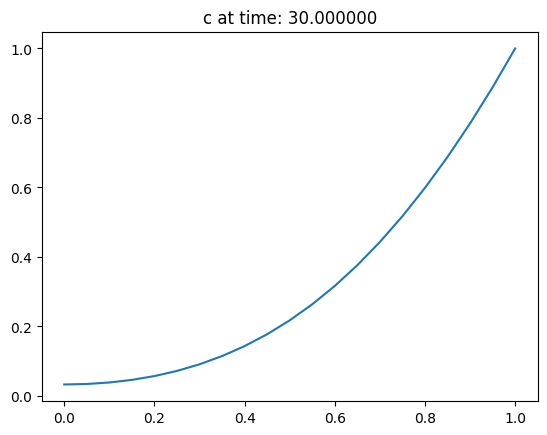

0.03283247108710287


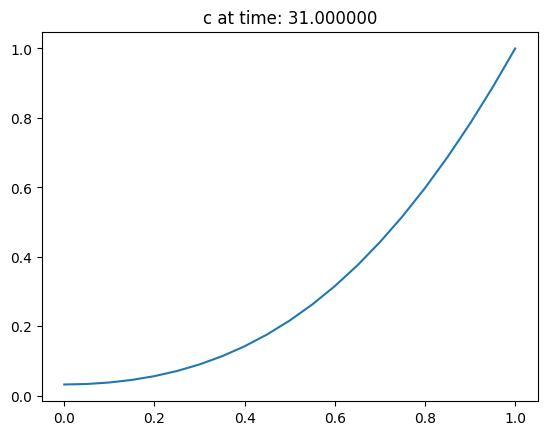

0.03258346399763345


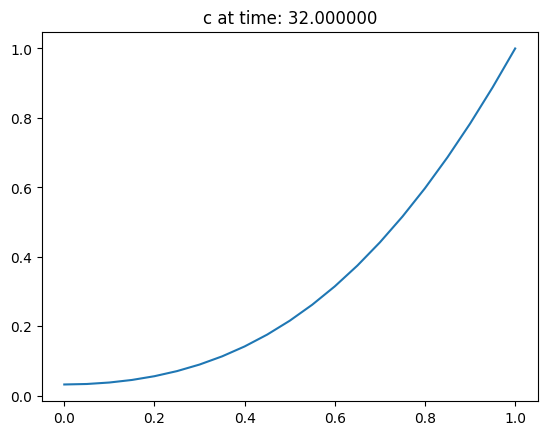

0.032329349156179715


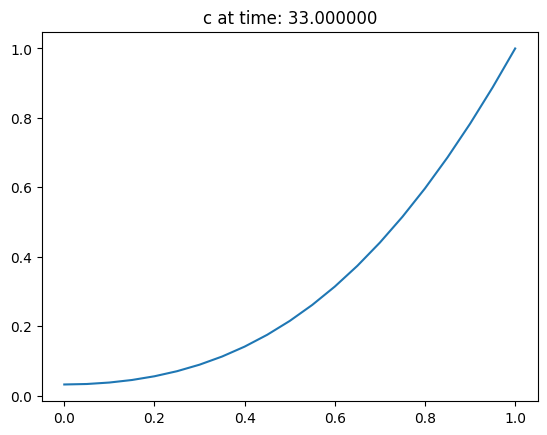

0.03207313220769846


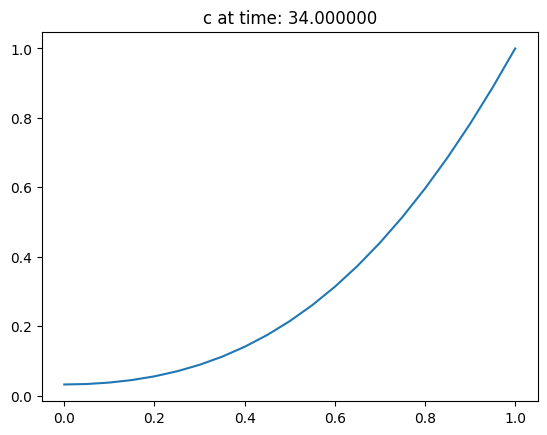

0.03181745098075624


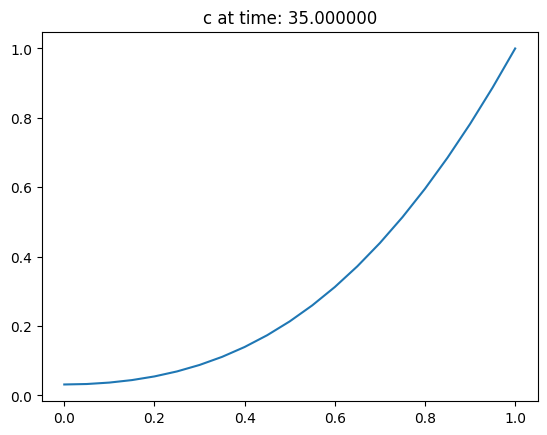

0.03156457614192063


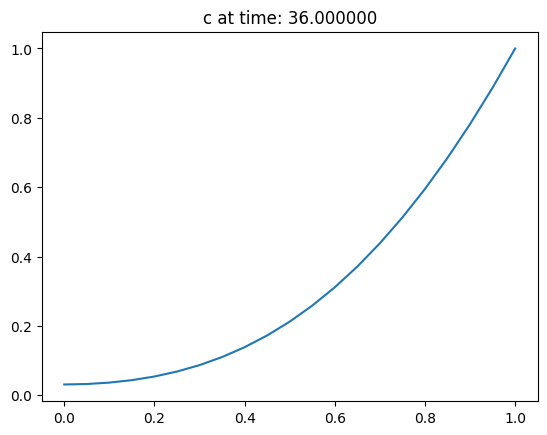

0.031316431364784465


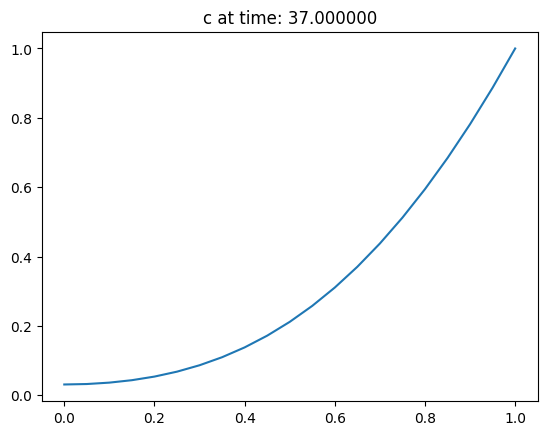

0.031074621163880517


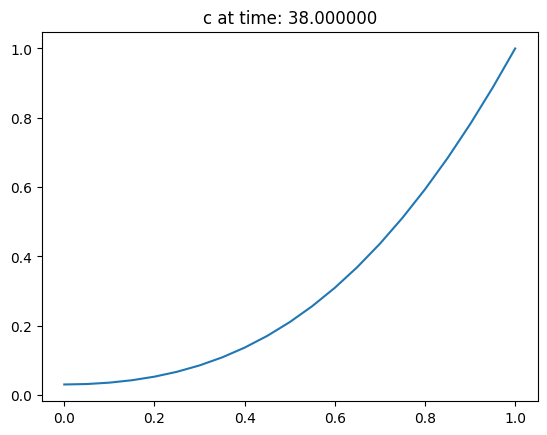

0.030840459376749927


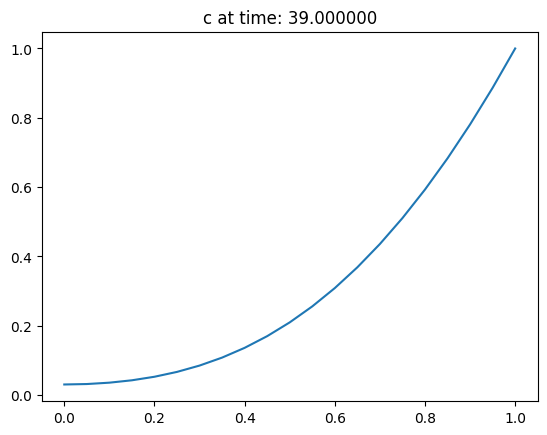

0.030614995368003713


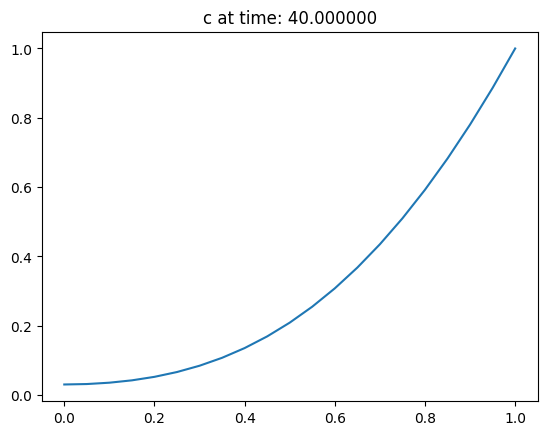

0.0303990376232387


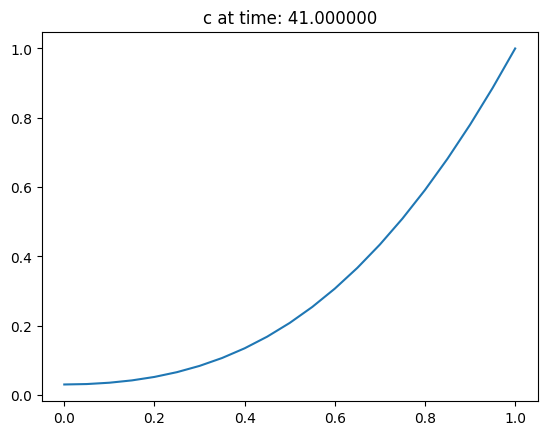

0.030193175597104216


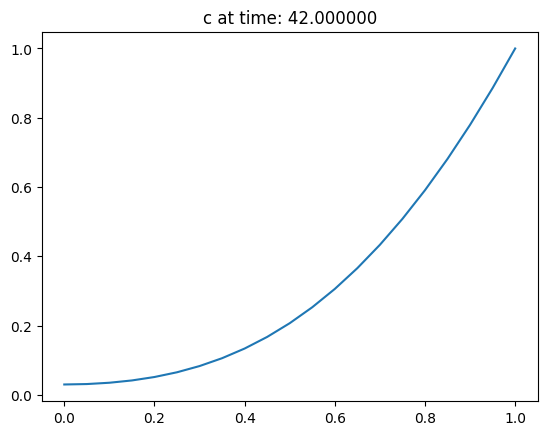

0.029997800904261976


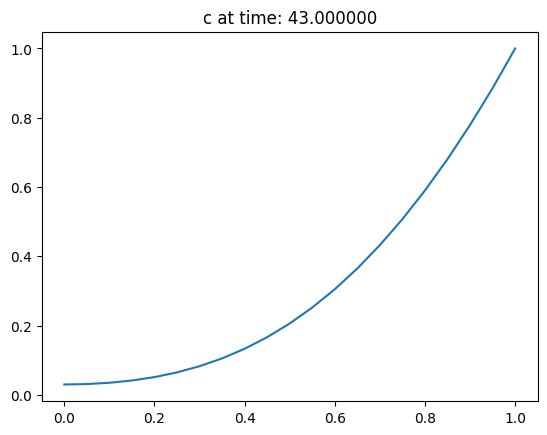

0.029813128637846114


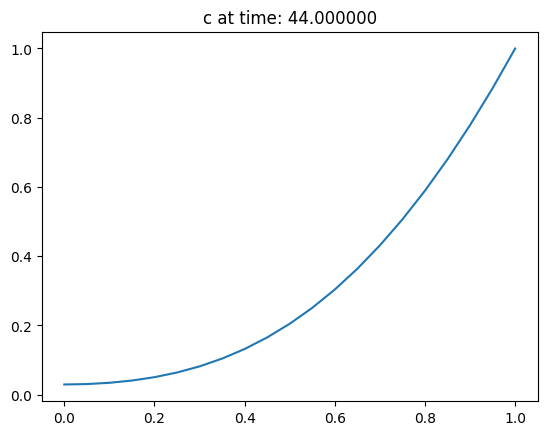

0.02963921910907851


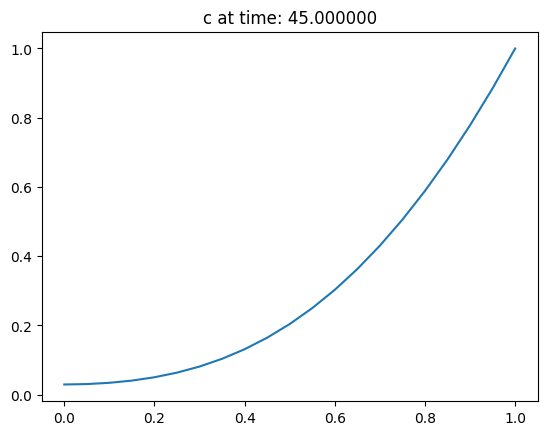

0.02947599984316394


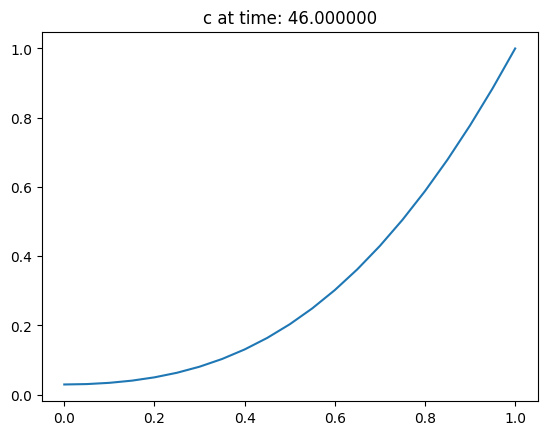

0.029323287354136807


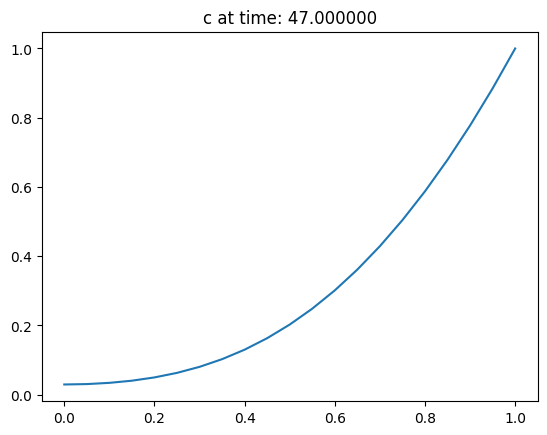

0.02918080808693525


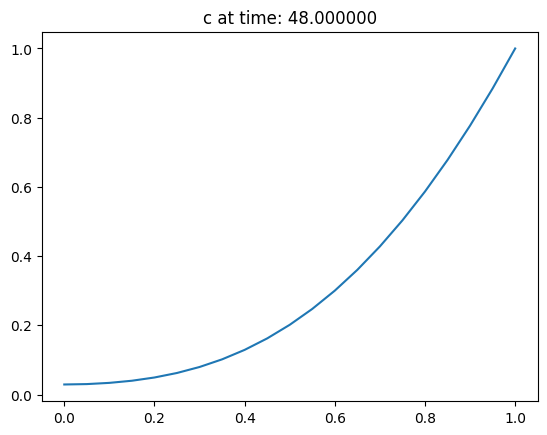

0.02904821793708557


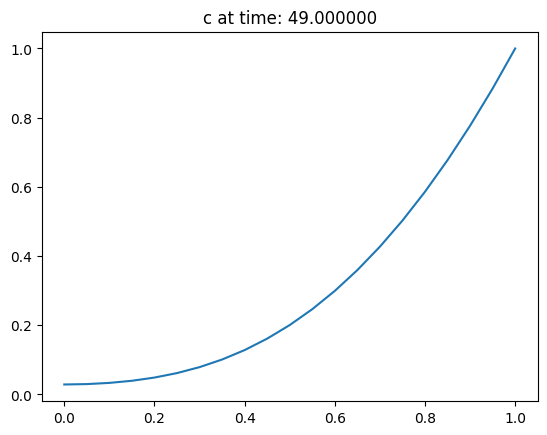

0.028925119887532602


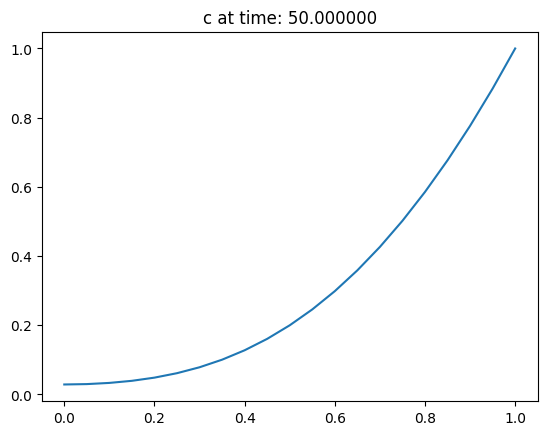

0.028811079481826565


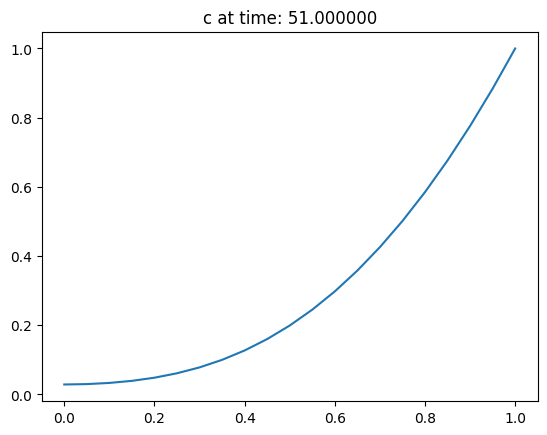

0.02870563803532665


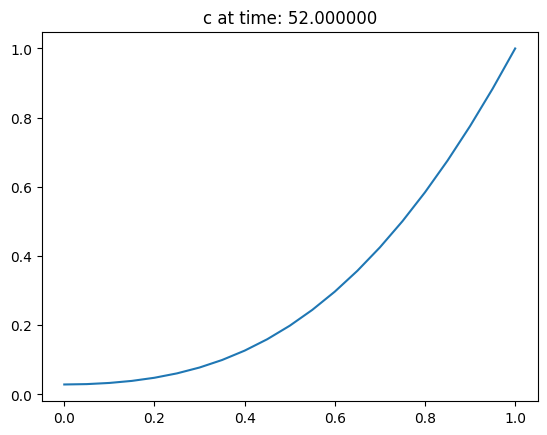

0.028608323638939104


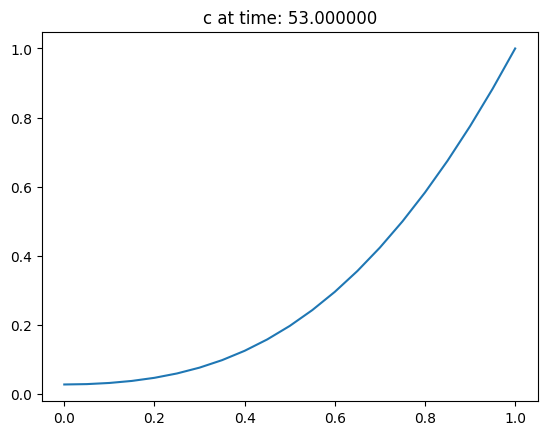

0.028518660118618797


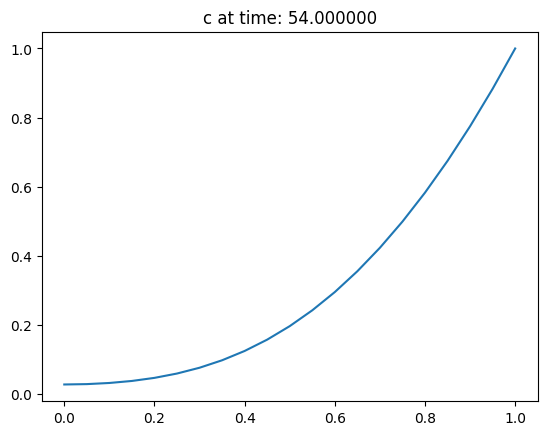

0.02843617417630508


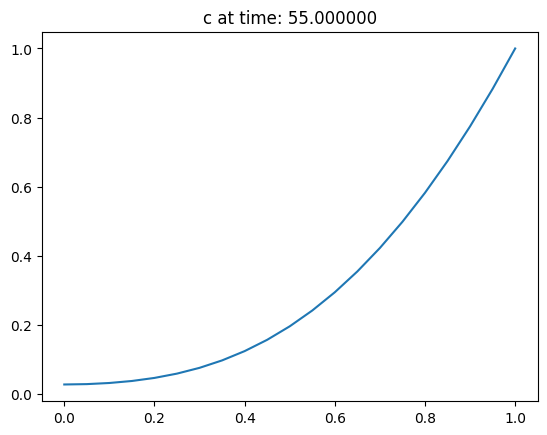

0.0283604009620175


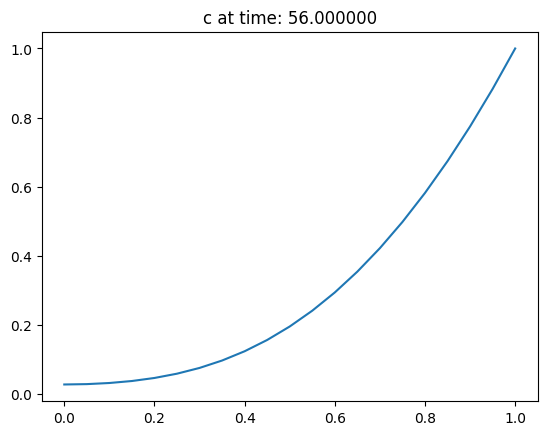

0.028290888323299103


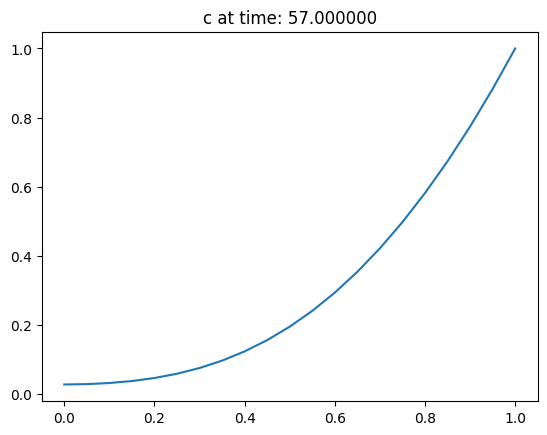

0.02822719995788526


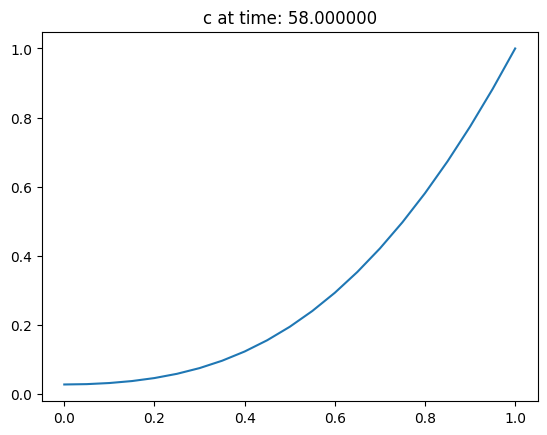

0.028168917667655016


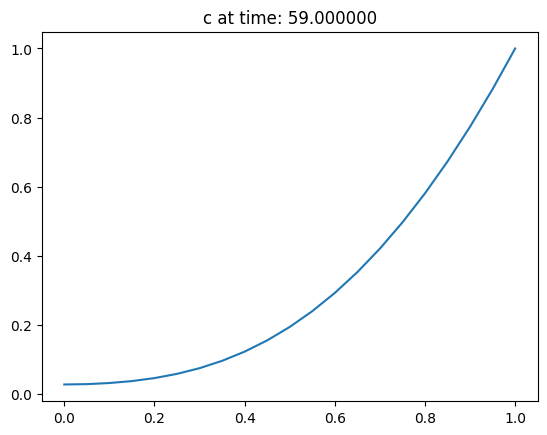

0.028115642882388867


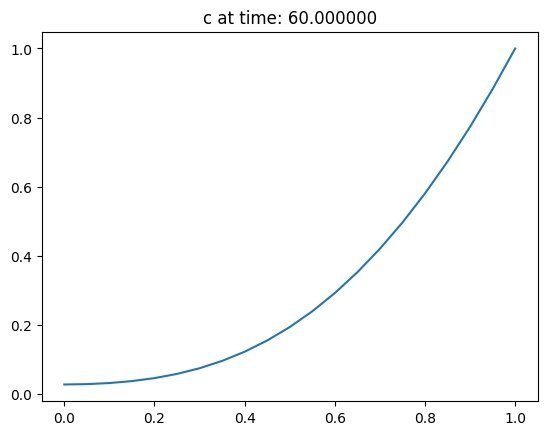

0.028066997594636257


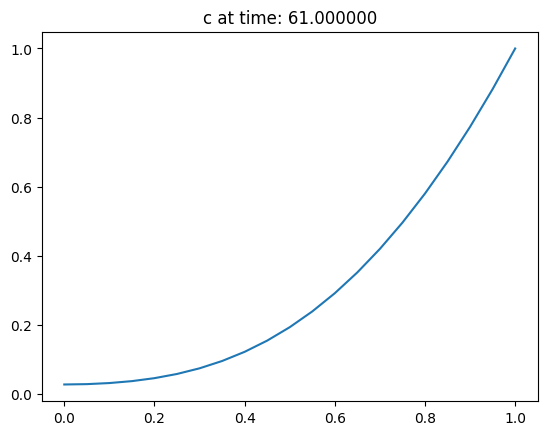

0.02802262482291672


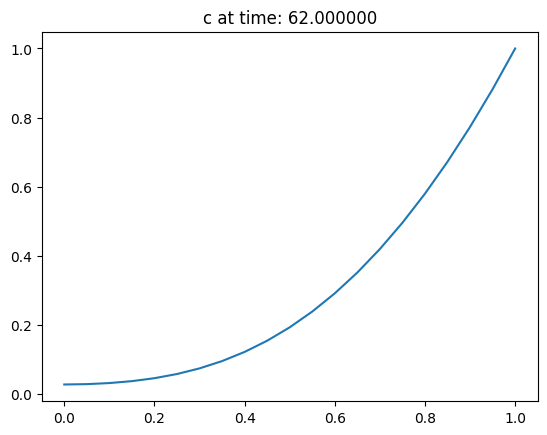

0.0279821887005714


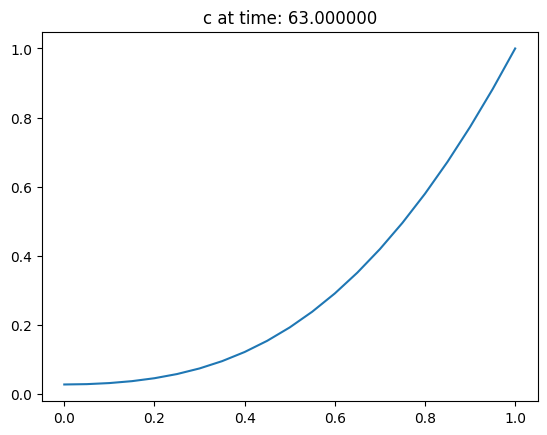

0.027945374270874734


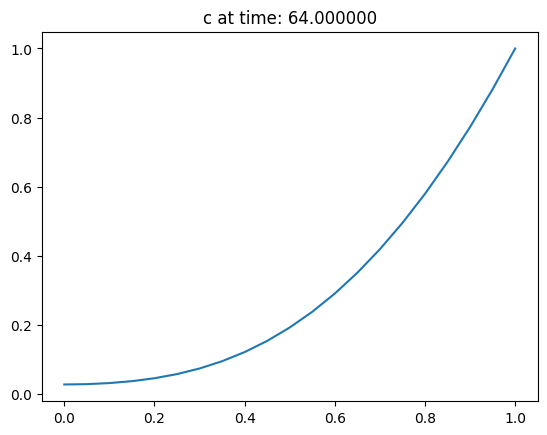

0.027911887055239424


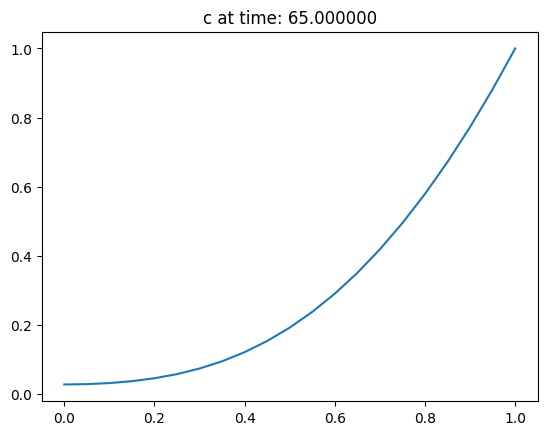

0.02788145244989535


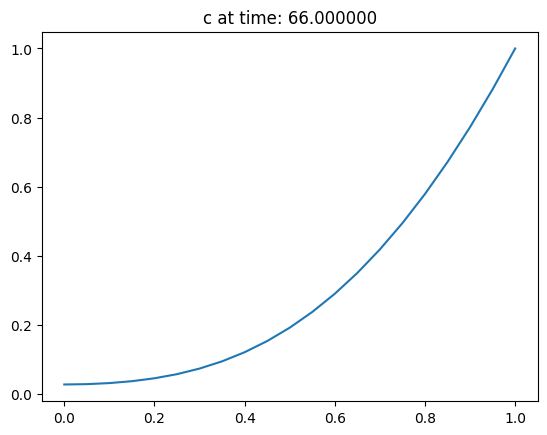

0.02785381499659367


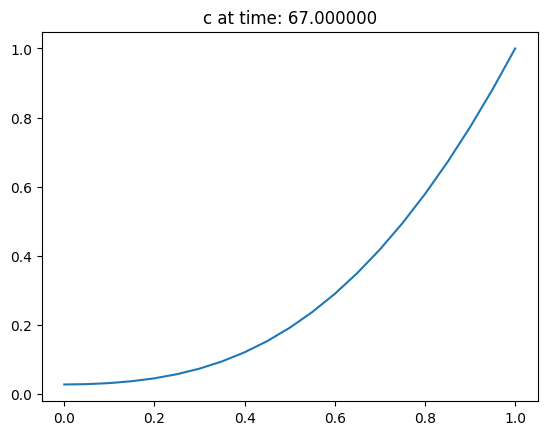

0.02782873756465847


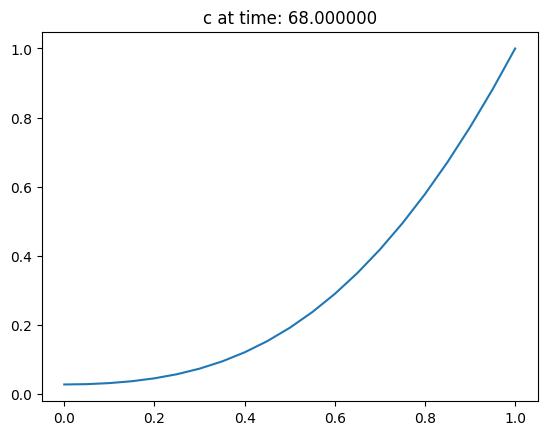

0.02780600047468574


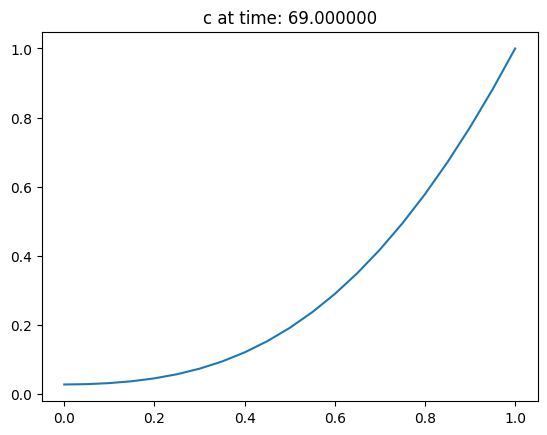

0.027785400588195026


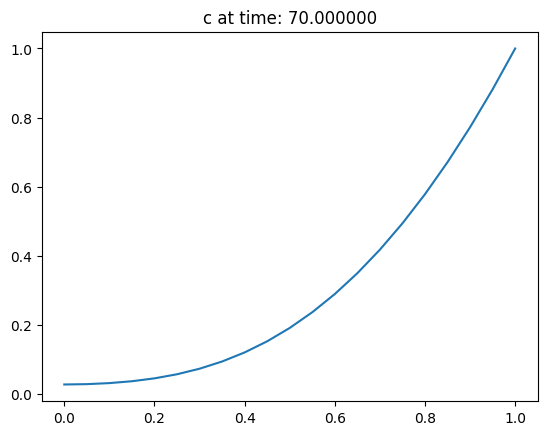

0.027766750382498318


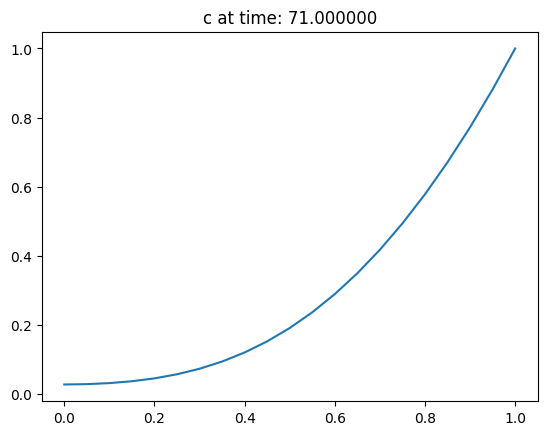

0.027749877025988773


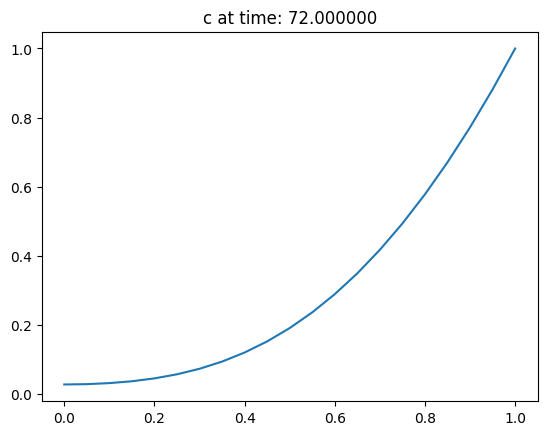

0.02773462146541918


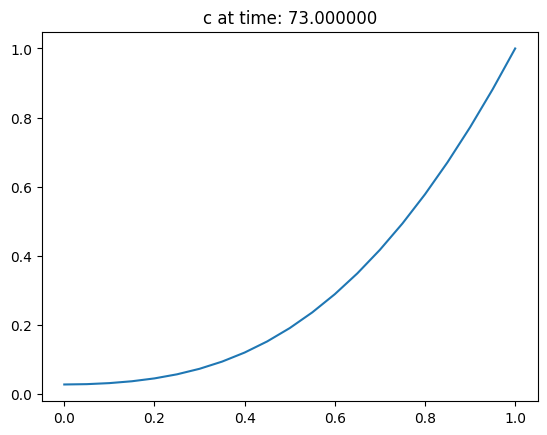

0.027720837534129454


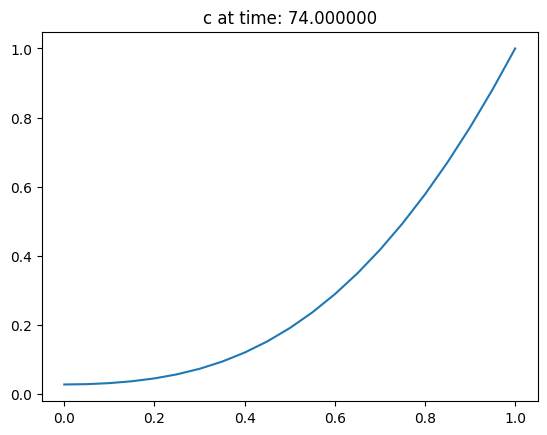

0.027708391087772198


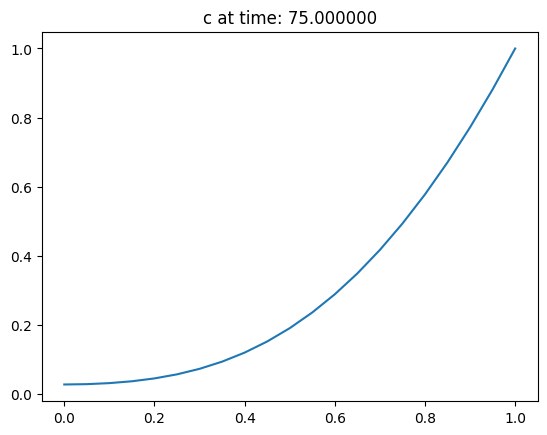

0.027697159172321805


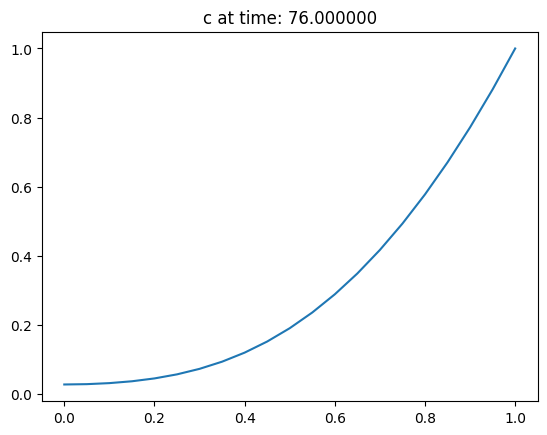

0.027687029227719647


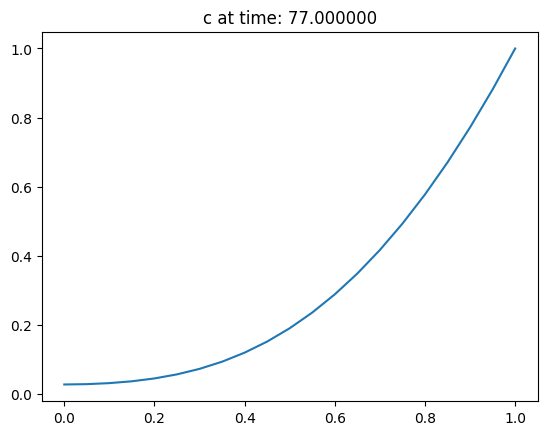

0.027677898329285265


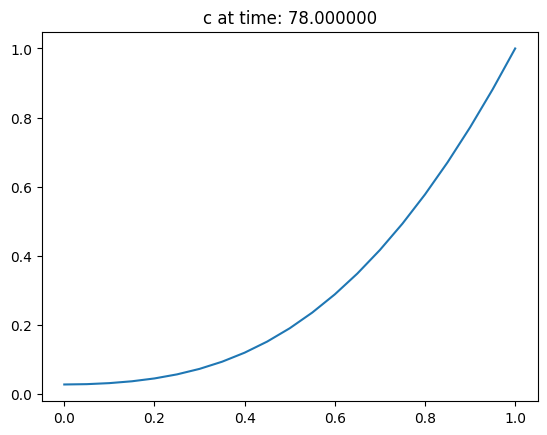

0.027669672468148235


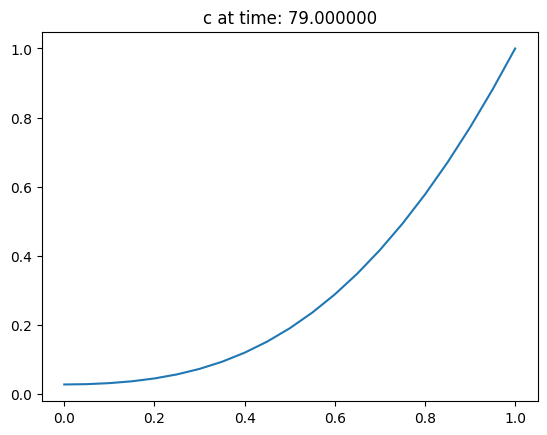

0.027662265871242615


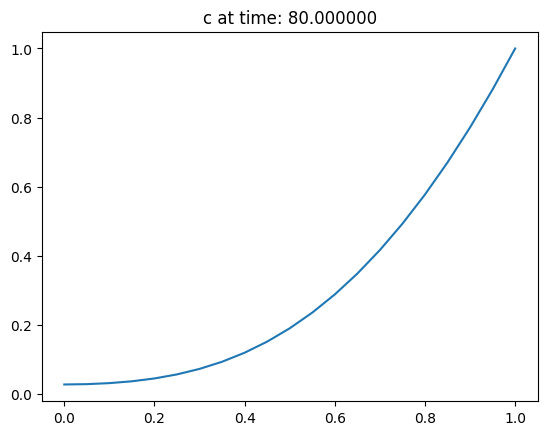

0.027655600360788807


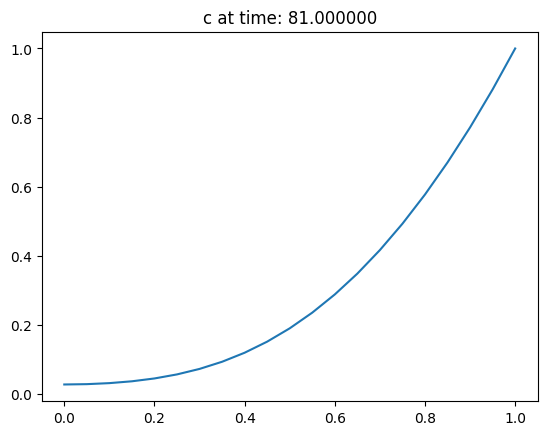

0.027649604752828256


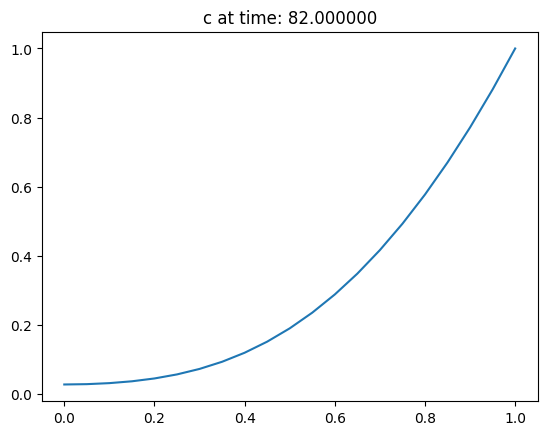

0.027644214293879827


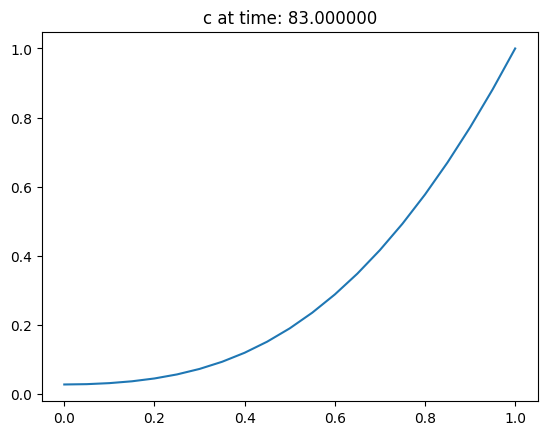

0.027639370134730324


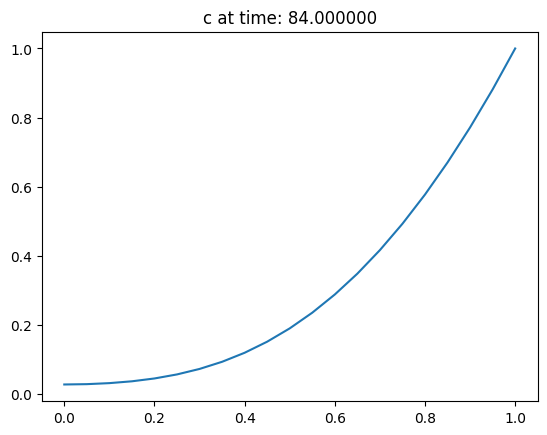

0.027635018839990907


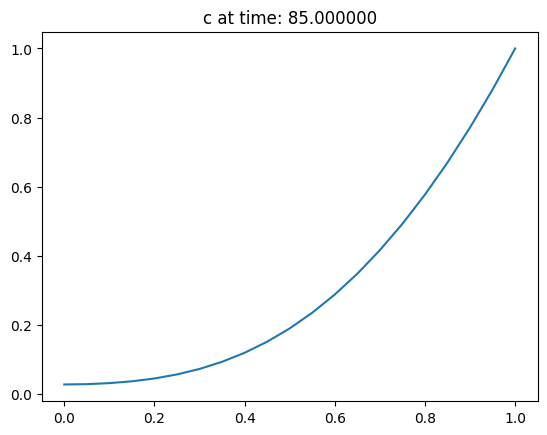

0.027631111932008772


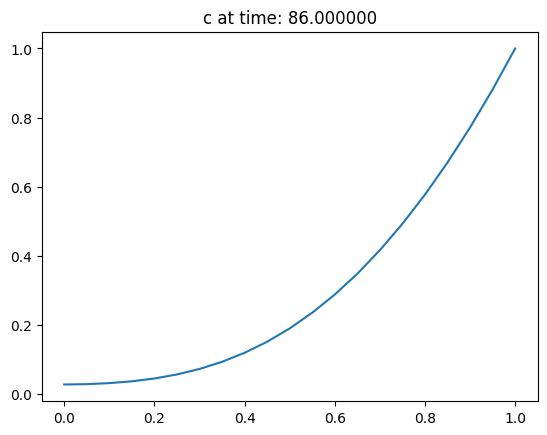

0.027627605467569597


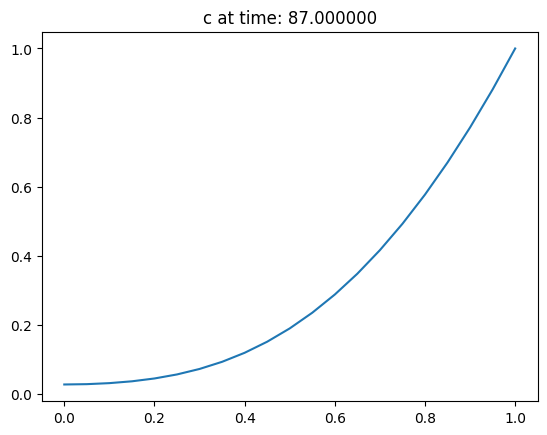

0.027624459645865858


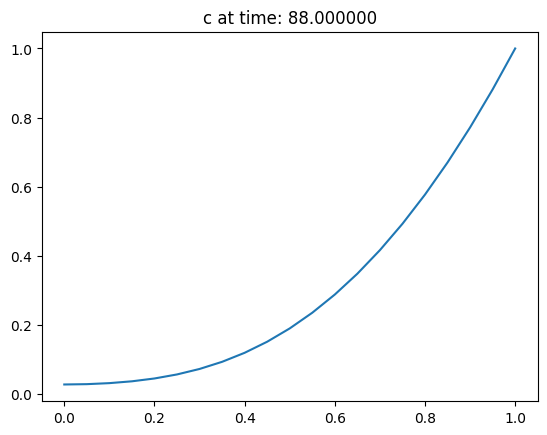

0.02762163844596941


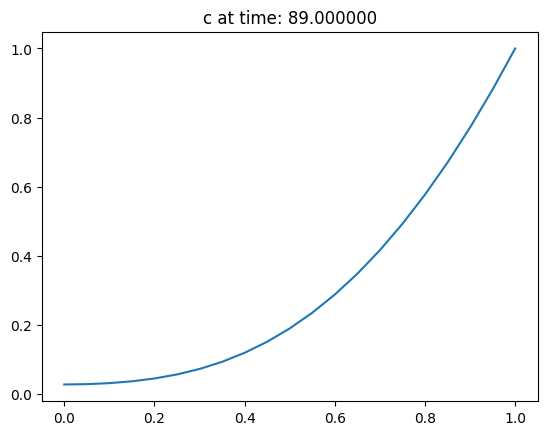

0.02761910929229039


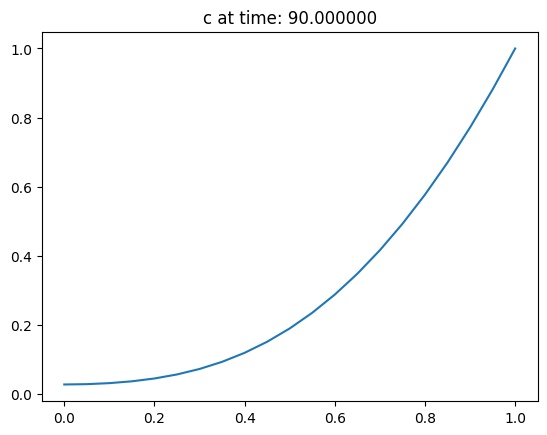

0.027616842746286906


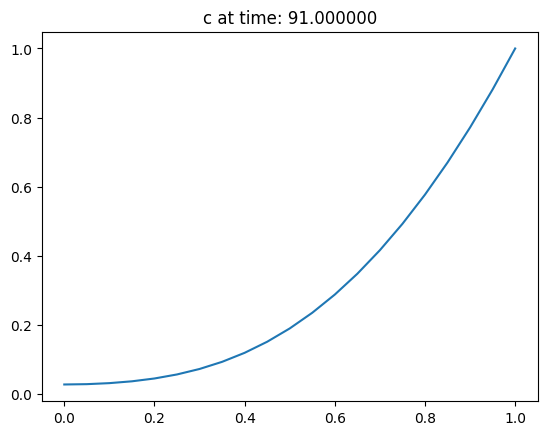

0.02761481222286766


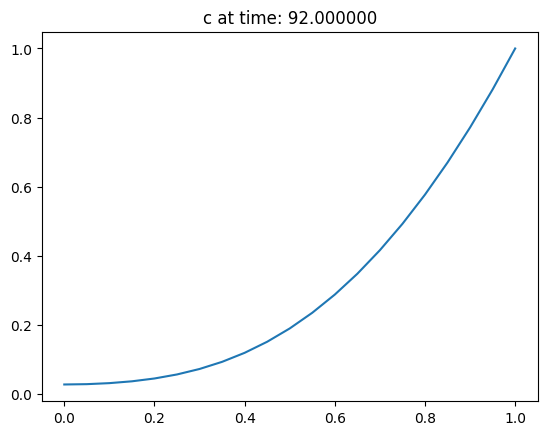

0.027612993729869216


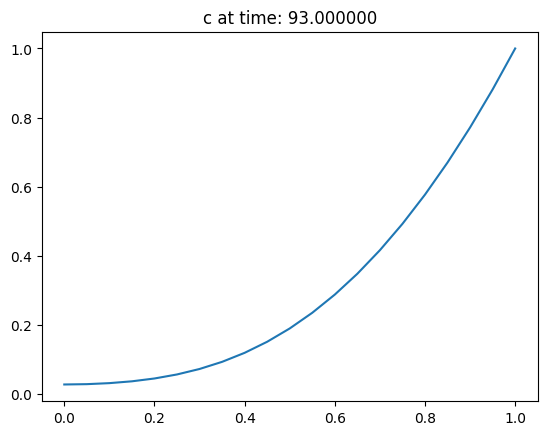

0.02761136562911323


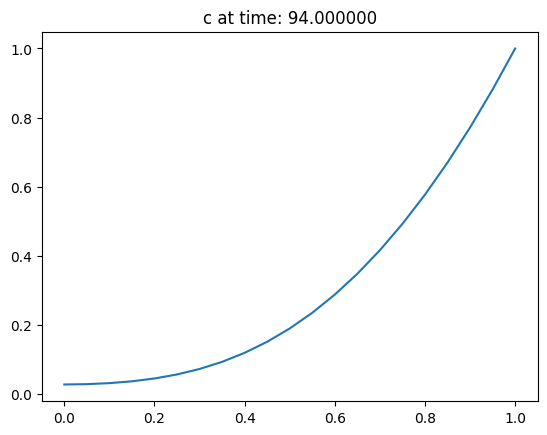

0.027609908417530808


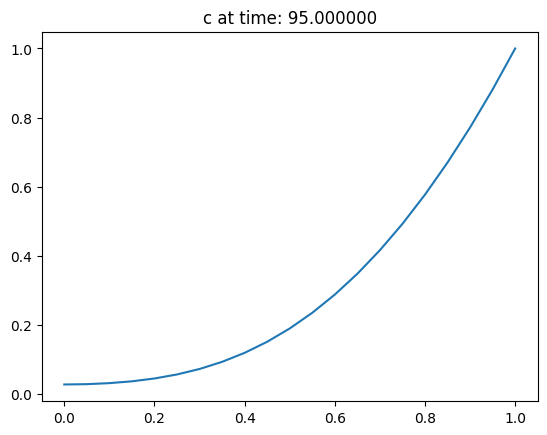

0.02760860452693916


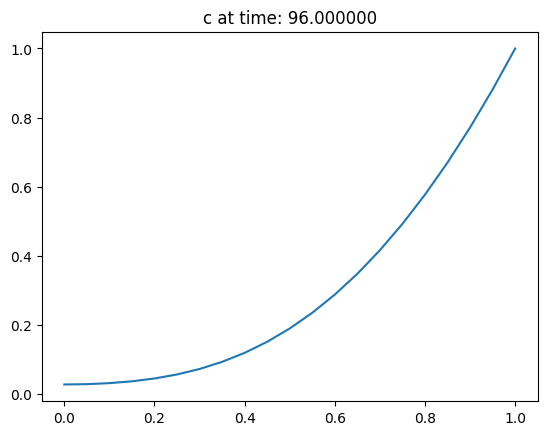

0.027607438141155214


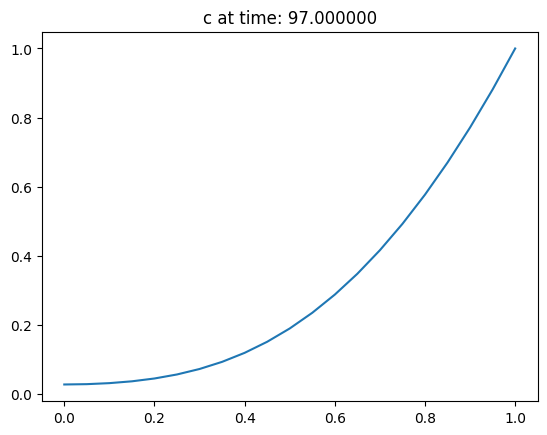

0.027606395029057477


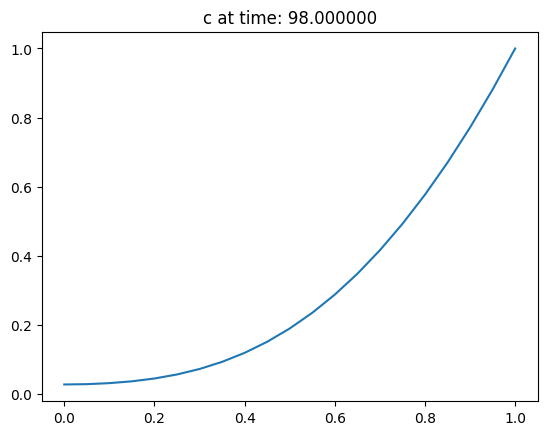

0.0276054623925021


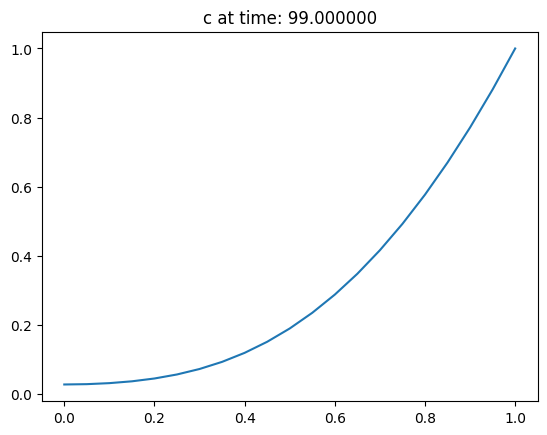

0.027604628727840447


In [13]:
# oxygen level test case 1
V = FunctionSpace(mesh,"P",2)
c = Function(V)
mesh1D = IntervalMesh(20,0,1)
V1D = FunctionSpace(mesh1D,'CG',1)
cfile = XDMFFile('solutions/B_Km1e-2/c.xdmf')
ctot = []
for i in range(100):
    cfile.read_checkpoint(c,"c",i)
    c1D = interpolate(c,V1D)
    sol = plot(c1D)
    plt.title('c at time: %f' %i)# %(i*save_interval*dt) )
    #plt.ylim([0,1])
    plt.show()
    ctot.append(assemble(c*dx))
    print(c1D.vector().min())
# plt.plot(ctot)

### Radiotherapy

In [100]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 
from fenics import File
import cranknicolson as cn
import bdf2 
mesh = UnitSquareMesh(20,20)
V = FunctionSpace(mesh,"P",2)

In [101]:
# Radiotherapy
dt = 0.1
T = 151
save_interval = 10
c0file = XDMFFile('solutions/B_Km1e-2/c.xdmf')
n0file = XDMFFile('solutions/B_Km1e-2/n.xdmf')
V = FunctionSpace(mesh,"P",2)
c0 = Function(V)
n0 = Function(V)
c0file.read_checkpoint(c0,"c",100)
n0file.read_checkpoint(n0,"n",100)
# n0 = nnew
times = [0+1,1+1,2+1,3+1,4+1,7+1,8+1,9+1,10+1,11+1,14+1,15+1,16+1,17+1,18+1,21+1,22+1,23+1,24+1,25+1,28+1,29+1,30+1,31+1,32+1]
doses = 2*np.ones_like(times)
# times = [0+1,7+1,14+1,21+1,28+1]
# doses = 10*np.ones_like(times)

path_sol = "solutions/bdf2_frt_dt0.1_T150"

solver = bdf2.Solver1D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass = solver.solve()

Solving linear variational problem.
iter=1: norm=7.25865e-07
Solving linear variational problem.
time=0.1: 
Solving linear variational problem.
iter=1: norm=5.74867e-07
Solving linear variational problem.
time=0.2: 
Solving linear variational problem.
iter=1: norm=4.74613e-07
Solving linear variational problem.time=0.3: 

Solving linear variational problem.
iter=1: norm=4.03414e-07
Solving linear variational problem.
time=0.4: 
Solving linear variational problem.
iter=1: norm=3.5138e-07
Solving linear variational problem.time=0.5: 

Solving linear variational problem.
iter=1: norm=3.1306e-07
Solving linear variational problem.
time=0.6: 
Solving linear variational problem.
iter=1: norm=2.84889e-07
Solving linear variational problem.
time=0.7: 
Solving linear variational problem.
iter=1: norm=2.64282e-07
Solving linear variational problem.time=0.8: 

Solving linear variational problem.
iter=1: norm=2.49288e-07
Solving linear variational problem.
time=0.9: 
Solving linear variational pro

0.6558852552921498 0.6284119039589322


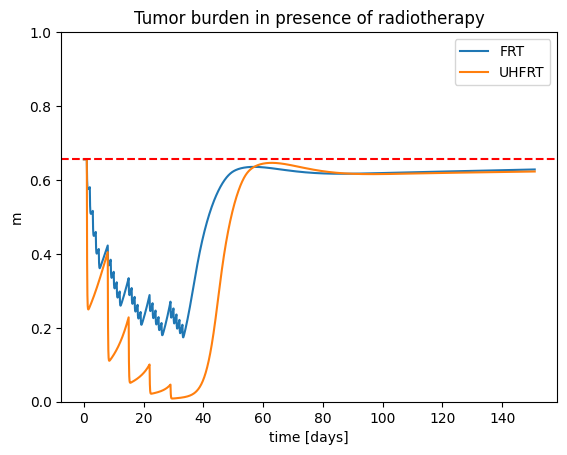

In [105]:
mass1 = np.load('solutions/bdf2_frt_dt0.1_T150/mass.npy')
mass2 = np.load('solutions/bdf2_uhfrt_dt0.1_T150/mass.npy')
time1 = np.arange(0,151,0.1)
time2 = np.arange(0,151,0.1)
plt.plot(time1,mass1)
plt.plot(time2,mass2)
plt.ylim([0,1])
plt.axhline(mass1[0],color='r',linestyle='--')
plt.xlabel('time [days]')
plt.title('Tumor burden in presence of radiotherapy')
plt.ylabel('m')
print(mass1[0],mass1[-1])
plt.legend(['FRT','UHFRT'])
# plt.axvline(33,color='green',linestyle='--')

0.036767432803284 0.392032155052148 0.57245572841078
(array([419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431,
       432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444,
       445, 446, 447, 448]),)


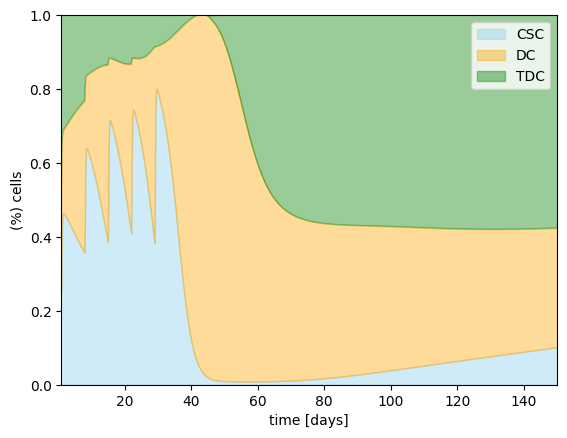

In [126]:
path_sol = 'solutions/bdf2_uhfrt_dt0.1_T150'
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
# mass = np.load('solutions/B_uhfrt_Km1e-2/mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time01=np.arange(0,151,0.1)
plt.fill_between(time01, csc, color='skyblue', alpha=0.4)
plt.fill_between(time01, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time01, csc+dc+tdc, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
plt.xlim([1,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
i = int(49/0.05)
print(csc[i],dc[i],tdc[i])
# i = 141
# print(csc[i]*mass[i],dc[i]*mass[i],tdc[i]*mass[i])
# print(mass[i])
print(np.where(tdc<0))


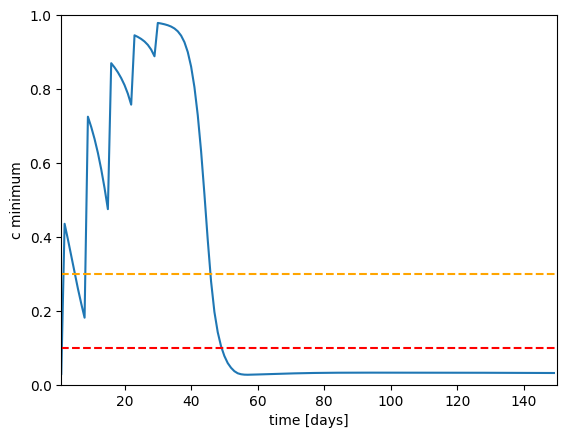

In [127]:
V = FunctionSpace(mesh,"P",2)
c1 = Function(V)
c_min1 = []
cfile1 = XDMFFile('solutions/bdf2_uhfrt_dt0.1_T150/c.xdmf')
for i in range(150):
    cfile1.read_checkpoint(c1,"c",i)
    c_min1.append(c1.vector().min())
plt.plot(c_min1)
plt.ylim([0,1])
plt.xlim([1,150])
plt.xlabel('time [days]')
plt.ylabel('c minimum')
plt.axhline(0.3,color='orange',linestyle='--')
plt.axhline(0.1,color='r',linestyle='--')

0.003002036079944621


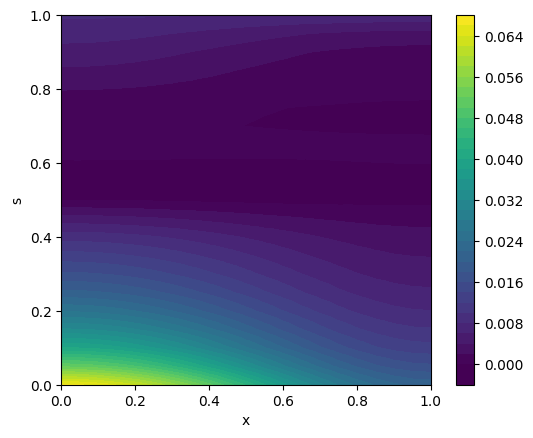

In [129]:
n = Function(V)
nfile = XDMFFile('solutions/bdf2_uhfrt_dt0.1_T150/n.xdmf')
nfile.read_checkpoint(n,"n",30)
sol = plot(n,vmin=0)
plt.colorbar(sol)
# plt.title('n at time t=%f' %(33*save_interval*dt))
plt.xlabel('x')
plt.ylabel('s')
print(n(0.5,0.9))
plt.show()



## Non-symmetric case

In [ ]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import functions as f 
from fenics import File

In [ ]:
mesh_rect = RectangleMesh(Point(-1,0),Point(1,1),40,20)
plot(mesh_rect)

In [ ]:
# non symmetrical case
m0 = 1e-3
dt = 0.5
T = 100
save_interval = 2
times = []
doses = []
V = FunctionSpace(mesh_rect,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[1]-s0,2)/(2*sigma*sigma) - pow(x[0],2)/(2*sigmax*sigmax) )",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigmax =sqrt(0.002),degree=2)
n0 = interpolate(n0,V)
c_k = interpolate(Constant(1.0), V)
path_sol = "solutions/Vc_1e4"

solver = f.Solver1D(mesh_rect, V, n0, c_k, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass = solver.solve()

In [ ]:
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)
plt.xlabel('time [days]')
plt.ylabel('m')
plt.title('Tumour burden')
plt.show()
mass[-1]

In [ ]:
# oxygen level test case 2
V = FunctionSpace(mesh_rect,"P",2)
c = Function(V)
mesh1D = IntervalMesh(20,-1,1)
V1D = FunctionSpace(mesh1D,'CG',1)
cfile = XDMFFile(path_sol + '/c.xdmf')
dt = 0.5
T = 100
save_interval = 2
for i in range(int(T/dt/save_interval)+1):
    cfile.read_checkpoint(c,"c",i)
    c1D = interpolate(c,V1D)
    sol = plot(c1D)
    plt.title('c at time: %f' %(i*save_interval*dt) )
    plt.show()

In [ ]:
# cell distribution test case 2
n = Function(V)
nfile = XDMFFile(path_sol + '/n.xdmf')
for i in range(int(T/dt)//save_interval + 1):
    nfile.read_checkpoint(n,"n",i)
    sol = plot(n)
    plt.colorbar(sol)
    plt.title('n at time t=%f' %(i*save_interval*dt))
    plt.xlabel('x')
    plt.ylabel('s')
    plt.show()